# Kerri Anderson
 Project 5
 
 Credit Card User Churn
 
 September 2021
 
 AIML

The purpose of this project is to identify customers who are likely to cancel their credit card accounts. As credit cards are a strong source of income for banks, the bank seeks to identify persons who are likely to cancel their account, based on past trends, so they can take targeted actions to prevent current and future cusotmers from closing their accounts.

We will use historical data to identify patterns in customer profiles that align with account cancelations.

Several modeling techniques will be used and compared within this project. Model tuning will be used to optimize model performance. The goal is to select a model that fits the following parameters: "Recall on the test set is expected to be > 0.95, and precision and accuracy is expected to be > 0.70"

Another goal of the project is to prevent data leakage, and to successfully transform the datasets and divide them into training, testing, and validation datasets without data leakage.

## Import Libraries

In [1]:
#!pip install imblearn

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To tune model, get different metric scores and split data
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
)

# To build a logistic regression model
from sklearn.linear_model import LogisticRegression

# To use statistical functions
import scipy.stats as stats

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To get different metric scores, and split data
from sklearn import metrics

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To be used for tuning the model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

#to build ML models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To suppress the warning
import warnings

warnings.filterwarnings("ignore")

# To be used for missing value imputation
from sklearn.impute import SimpleImputer

from scipy.stats import randint as sp_randint

## Import Data

In [2]:
ccdata_orig = pd.read_csv("BankChurners.csv")
ccdata=ccdata_orig.copy()

In [3]:
# Checking the number of rows and columns in the data
ccdata.shape

(10127, 21)

In [4]:
# let's view the first 5 rows of the data
ccdata.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School            NaN  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
0              39                         5                       1   
1              44                         6                       1   
2              36                         4                       1   
3              34                         3                       4   
4              21                         5                       1   

   Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0                      3     12691.000                  777        11914.000   
1                      2      8256.000                  864         7392.000   
2                      0      3418.000                    0         3418.000   
3                      1      3313.000                 2517          796.000   
4                      0      4716.000                    0         4716.000   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio  
0                  0.061  
1                  0.105  
2                  0.000  
3                  0.760  
4                  0.000

In [5]:
# let's view the last 5 rows of the data
ccdata.tail()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
10122        Graduate         Single     $40K - $60K          Blue   
10123             NaN       Divorced     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10125        Graduate            NaN     $40K - $60K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
10122              40                         3                       2   
10123              25                         4                       2   
10124              36                         5                       3   
10125              36                         4                       3   
10126              25                         6                       2   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
10122                      3      4003.000                 1851   
10123                      3      4277.000                 2186   
10124                      4      5409.000                    0   
10125                      3      5281.000                    0   
10126                      4     10388.000                 1961   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
10122         2152.000                 0.703            15476             117   
10123         2091.000                 0.804             8764              69   
10124         5409.000                 0.819            10291              60   
10125         5281.000                 0.535             8395              62   
10126         8427.000                 0.703            10294              61   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
10122                0.857                  0.462  
10123                0.683                  0.511  
10124                0.818                  0.000  
10125                0.722                  0.000  
10126                0.649                  0.189

Some object variables will need to be transformed into category variables or into numeric dummy or indicator variables in order to be usable by the model. We also will need to change the values for income as it is an ordered category variable. If transformations take place for the numeric variables we need to ensure data leakage does not occur.

In [6]:
# let's check the data types of the columns in the dataset
ccdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [7]:
# let's check for missing values in the data
ccdata.isnull().sum()

CLIENTNUM                      0
Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category                0
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

Will need to account for missing data in education level and marital status

In [8]:
#look at distributions of float and integer variables

ccdata.describe().apply(lambda s: s.apply('{0:.3f}'.format))

CLIENTNUM Customer_Age Dependent_count Months_on_book  \
count      10127.000    10127.000       10127.000      10127.000   
mean   739177606.334       46.326           2.346         35.928   
std     36903783.450        8.017           1.299          7.986   
min    708082083.000       26.000           0.000         13.000   
25%    713036770.500       41.000           1.000         31.000   
50%    717926358.000       46.000           2.000         36.000   
75%    773143533.000       52.000           3.000         40.000   
max    828343083.000       73.000           5.000         56.000   

      Total_Relationship_Count Months_Inactive_12_mon Contacts_Count_12_mon  \
count                10127.000              10127.000             10127.000   
mean                     3.813                  2.341                 2.455   
std                      1.554                  1.011                 1.106   
min                      1.000                  0.000                 0.000   
25%                      3.000                  2.000                 2.000   
50%                      4.000                  2.000                 2.000   
75%                      5.000                  3.000                 3.000   
max                      6.000                  6.000                 6.000   

      Credit_Limit Total_Revolving_Bal Avg_Open_To_Buy Total_Amt_Chng_Q4_Q1  \
count    10127.000           10127.000       10127.000            10127.000   
mean      8631.954            1162.814        7469.140                0.760   
std       9088.777             814.987        9090.685                0.219   
min       1438.300               0.000           3.000                0.000   
25%       2555.000             359.000        1324.500                0.631   
50%       4549.000            1276.000        3474.000                0.736   
75%      11067.500            1784.000        9859.000                0.859   
max      34516.000            2517.000       34516.000                3.397   

      Total_Trans_Amt Total_Trans_Ct Total_Ct_Chng_Q4_Q1 Avg_Utilization_Ratio  
count       10127.000      10127.000           10127.000             10127.000  
mean         4404.086         64.859               0.712                 0.275  
std          3397.129         23.473               0.238                 0.276  
min           510.000         10.000               0.000                 0.000  
25%          2155.500         45.000               0.582                 0.023  
50%          3899.000         67.000               0.702                 0.176  
75%          4741.000         81.000               0.818                 0.503  
max         18484.000        139.000               3.714                 0.999

- Customer age ranges from 26-73 with a median of 46(mean of 46.3)
- Dependent count ranges from 0 to 5 with a median of 2 (mean 2.3)
- Months on book ranges from 13 (just over a year) to 56 (4.7 years) with a median of 36 (mean 35.9)
- Total relationship count ranges from 1 to 6 with a median of 4 (mean 3.8)
- Overall the values of the numeric variables appear to be within reason. It is a bit surprising that the total contacts count and months inactive counts only go up to 6. I would verify with the data source that these were accurate, as they are both counts out of 12 months I would expect the months inactive range from 0-12 and contacts be 0 to >12.

- In the case any modifications are needed to the numeric variables we should ensure no data leakage takes place.


In [9]:
#what are values of object variables
ccdata['Attrition_Flag'].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

In [10]:
ccdata['Attrition_Flag'].value_counts(normalize=True)

Existing Customer   0.839
Attrited Customer   0.161
Name: Attrition_Flag, dtype: float64

In [11]:
ccdata['Gender'].value_counts()

F    5358
M    4769
Name: Gender, dtype: int64

In [12]:
ccdata['Education_Level'].value_counts()

Graduate         3128
High School      2013
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

In [13]:
ccdata['Marital_Status'].value_counts()

Married     4687
Single      3943
Divorced     748
Name: Marital_Status, dtype: int64

In [14]:
ccdata['Income_Category'].value_counts()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
abc               1112
$120K +            727
Name: Income_Category, dtype: int64

In [15]:
ccdata['Card_Category'].value_counts()

Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64

## Data Pre-processing

In [16]:
# checking for unique values in the ID column
ccdata["CLIENTNUM"].nunique()

10127

In [17]:
#drop the CLIENTNUM variable as all values are unique
ccdata.drop(["CLIENTNUM"], axis=1, inplace=True)

In [18]:
#dummy variables are needed for attrition indicator
ccdata=pd.get_dummies(ccdata,columns=["Attrition_Flag"],drop_first=False)

In [19]:
ccdata.head()

Customer_Age Gender  Dependent_count Education_Level Marital_Status  \
0            45      M                3     High School        Married   
1            49      F                5        Graduate         Single   
2            51      M                3        Graduate        Married   
3            40      F                4     High School            NaN   
4            40      M                3      Uneducated        Married   

  Income_Category Card_Category  Months_on_book  Total_Relationship_Count  \
0     $60K - $80K          Blue              39                         5   
1  Less than $40K          Blue              44                         6   
2    $80K - $120K          Blue              36                         4   
3  Less than $40K          Blue              34                         3   
4     $60K - $80K          Blue              21                         5   

   Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
0                       1                      3     12691.000   
1                       1                      2      8256.000   
2                       1                      0      3418.000   
3                       4                      1      3313.000   
4                       1                      0      4716.000   

   Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0                  777        11914.000                 1.335   
1                  864         7392.000                 1.541   
2                    0         3418.000                 2.594   
3                 2517          796.000                 1.405   
4                    0         4716.000                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0             1144              42                1.625   
1             1291              33                3.714   
2             1887              20                2.333   
3             1171              20                2.333   
4              816              28                2.500   

   Avg_Utilization_Ratio  Attrition_Flag_Attrited Customer  \
0                  0.061                                 0   
1                  0.105                                 0   
2                  0.000                                 0   
3                  0.760                                 0   
4                  0.000                                 0   

   Attrition_Flag_Existing Customer  
0                                 1  
1                                 1  
2                                 1  
3                                 1  
4                                 1

In [20]:
ccdata.drop(["Attrition_Flag_Existing Customer"], axis=1, inplace=True)

We created the dummy variables for attrition flag. Keep the "attritted customer" indicator, as it will be equal to 1 if the customer has attritted. As the model looks to identify customers likely to atrit it is best to keep this variable and drop the "existing customer" indicator.

In [21]:
#convert object types to category types
ccdata["Gender"] = ccdata["Gender"].astype("category")
ccdata["Education_Level"] = ccdata["Education_Level"].astype("category")
ccdata["Marital_Status"] = ccdata["Marital_Status"].astype("category")
ccdata["Income_Category"] = ccdata["Income_Category"].astype("category")
ccdata["Card_Category"] = ccdata["Card_Category"].astype("category")

In [22]:
#convert dependent count to number
ccdata["Dependent_count"] = ccdata["Dependent_count"].astype("int64")

In [23]:
ccdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   Customer_Age                      10127 non-null  int64   
 1   Gender                            10127 non-null  category
 2   Dependent_count                   10127 non-null  int64   
 3   Education_Level                   8608 non-null   category
 4   Marital_Status                    9378 non-null   category
 5   Income_Category                   10127 non-null  category
 6   Card_Category                     10127 non-null  category
 7   Months_on_book                    10127 non-null  int64   
 8   Total_Relationship_Count          10127 non-null  int64   
 9   Months_Inactive_12_mon            10127 non-null  int64   
 10  Contacts_Count_12_mon             10127 non-null  int64   
 11  Credit_Limit                      10127 non-null  floa

# EDA

## Univariate Analysis of Categorical Variables

In [24]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

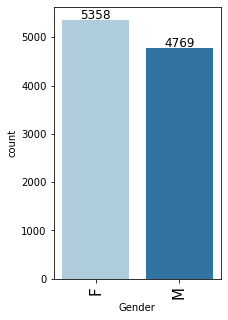

In [25]:
labeled_barplot(ccdata, "Gender") 

- The gender distribution is near an even split, with slighty more females

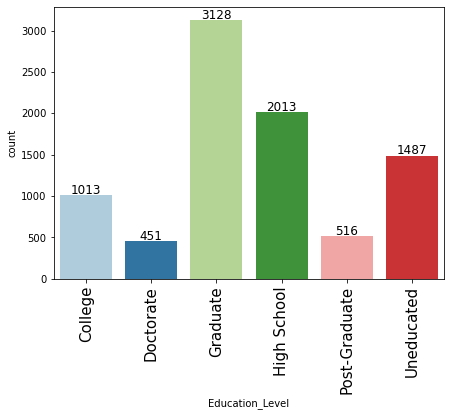

In [26]:
labeled_barplot(ccdata, "Education_Level")

- The most common education level is a college graduate

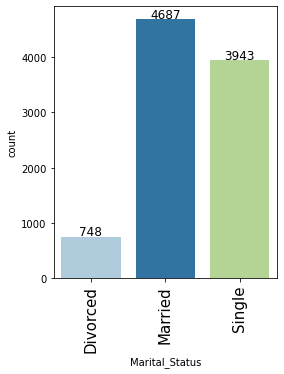

In [27]:
labeled_barplot(ccdata, "Marital_Status")

- Married is the most common marital status

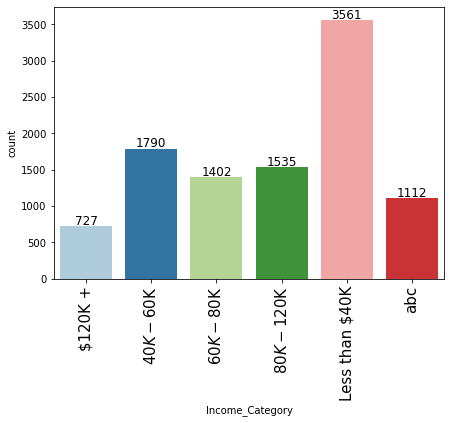

In [28]:
labeled_barplot(ccdata, "Income_Category")

- The most common value of income is <40k
- Missing value treatment is needed when value is "abc"

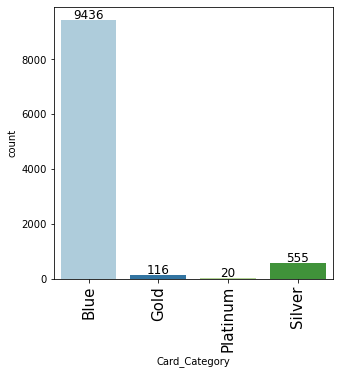

In [29]:
labeled_barplot(ccdata, "Card_Category")

- Blue is the most common card category, followed by Silver, Gold and Platinum
- Given the small number of records in other categories we should consider grouping Gold, Silver and Platinum, otherwise it could cause instability in the model

# Univariate Analysis of Continuous Variables

In [30]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

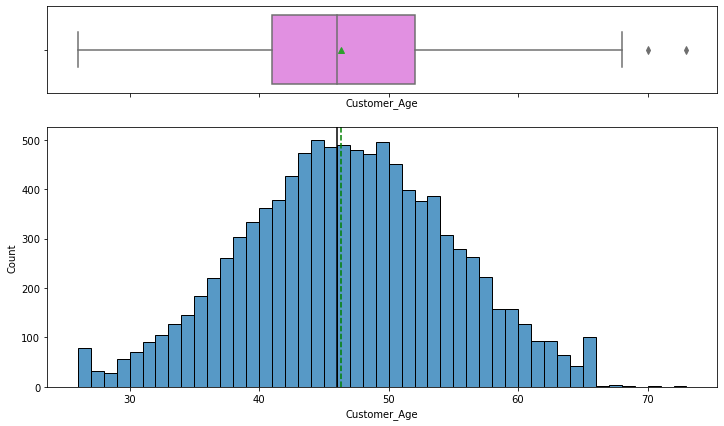

In [31]:
histogram_boxplot(ccdata, "Customer_Age")

- Age is fairly normally distributed

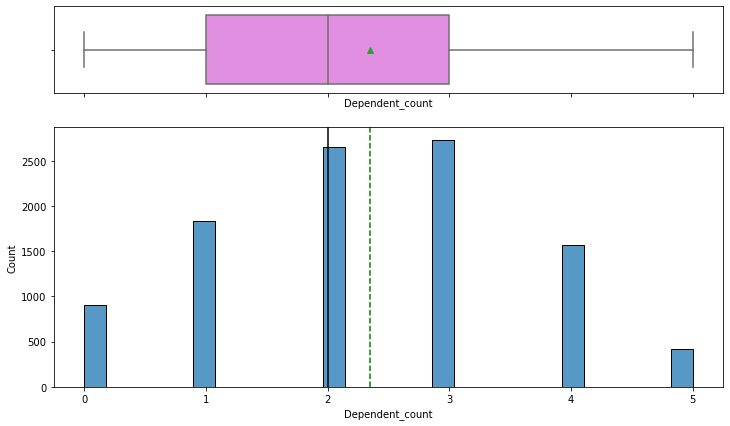

In [32]:
histogram_boxplot(ccdata, "Dependent_count")

- Dependent count is normally distributed with mean and median of 2-3

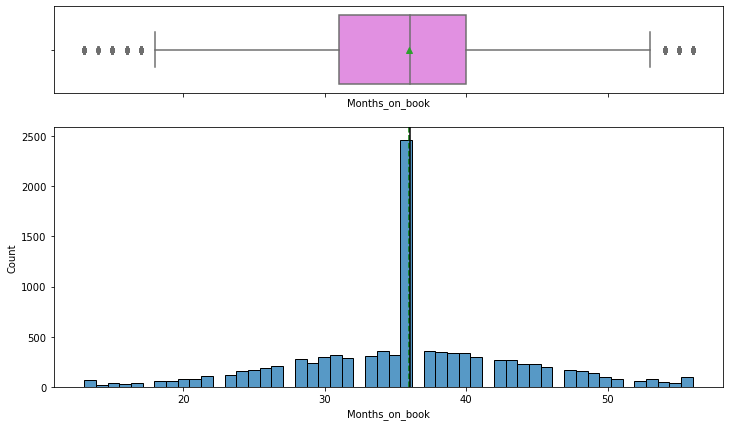

In [33]:
histogram_boxplot(ccdata, "Months_on_book")

- Months on book is fairly normally distributed except for the large amount of records with a value of 36. There might be an underlying error with the data, or some type of systematic issue that has led to this. I would check with the team that provided the data to ensure its accuracy.

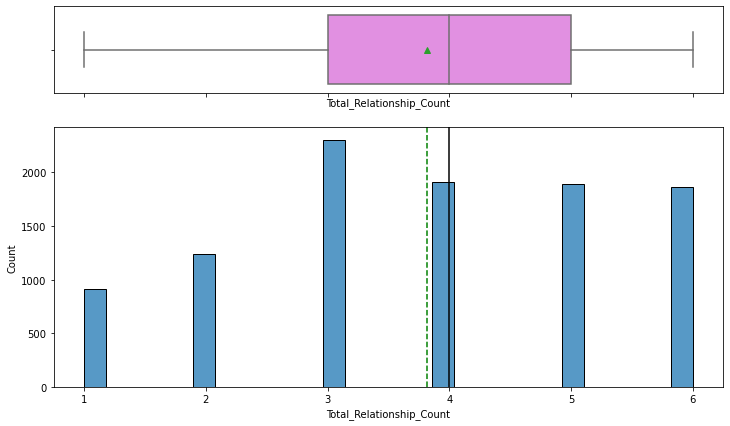

In [34]:
histogram_boxplot(ccdata, "Total_Relationship_Count")

- Total relationship count has good representation across all values, nearly a uniform distribution

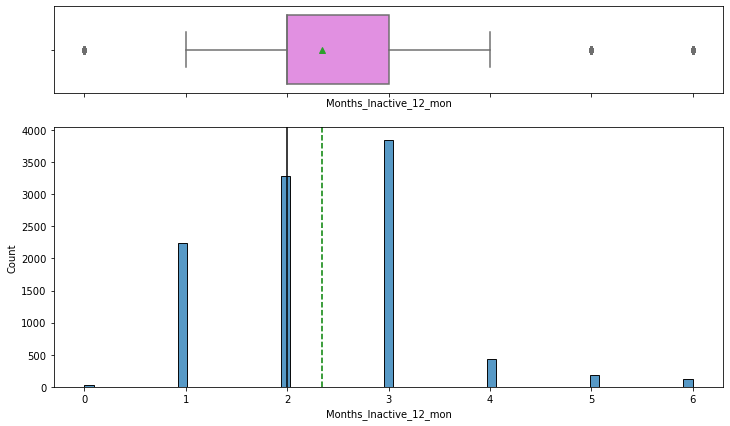

In [35]:
histogram_boxplot(ccdata, "Months_Inactive_12_mon")

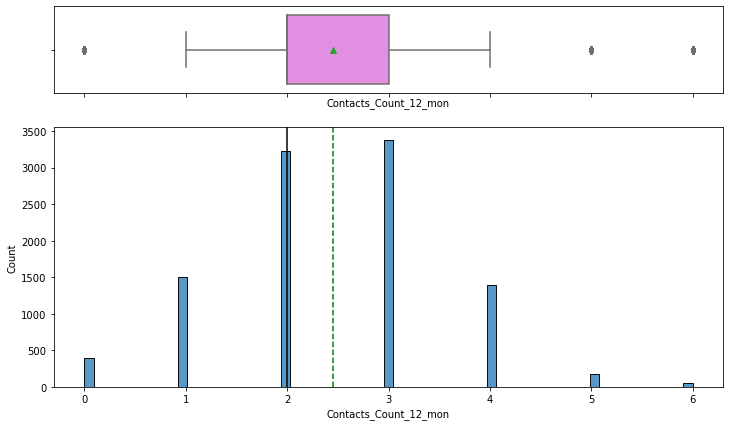

In [36]:
histogram_boxplot(ccdata, "Contacts_Count_12_mon")

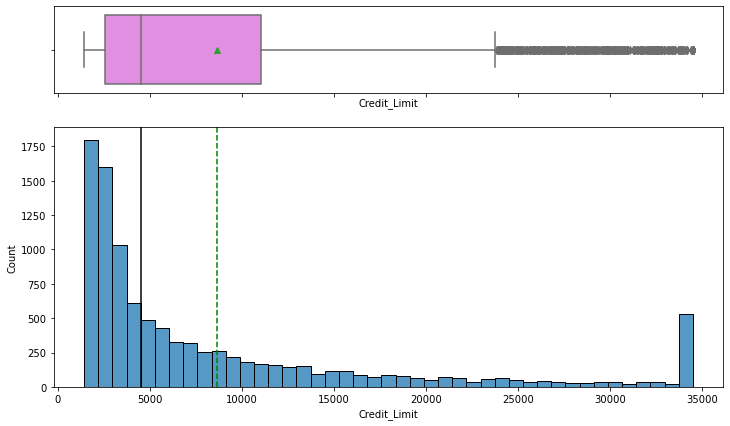

In [37]:
histogram_boxplot(ccdata, "Credit_Limit")

- credit limit may have caps at the minimum and maximum. It has a good distrubtion of values.

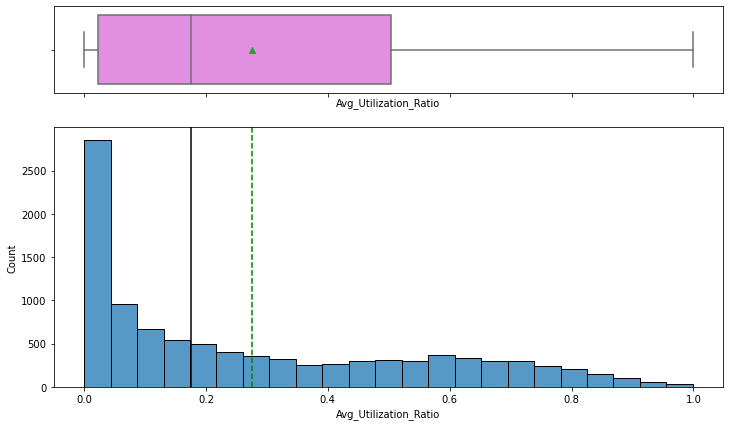

In [38]:
histogram_boxplot(ccdata, "Avg_Utilization_Ratio")

- Average utilization ratio has many records near 0 and very few close to 1

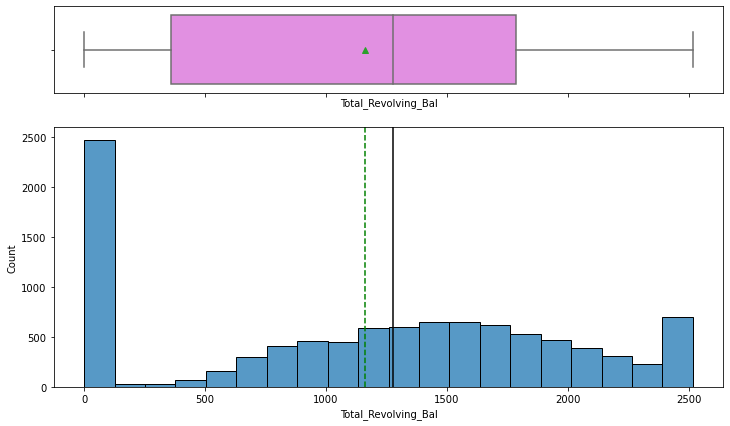

In [39]:
histogram_boxplot(ccdata, "Total_Revolving_Bal")

- Most customers hold a total revolving balance of 0. Otherwise, there is a nice normal distrubtion up to 2500, which might be the maximum as several observations are grouped at that value.

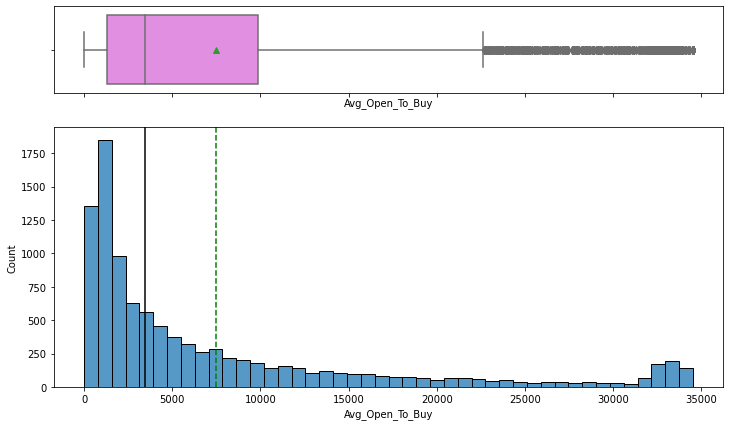

In [40]:
histogram_boxplot(ccdata, "Avg_Open_To_Buy")

- Average open to buy has a nice distribution of values.

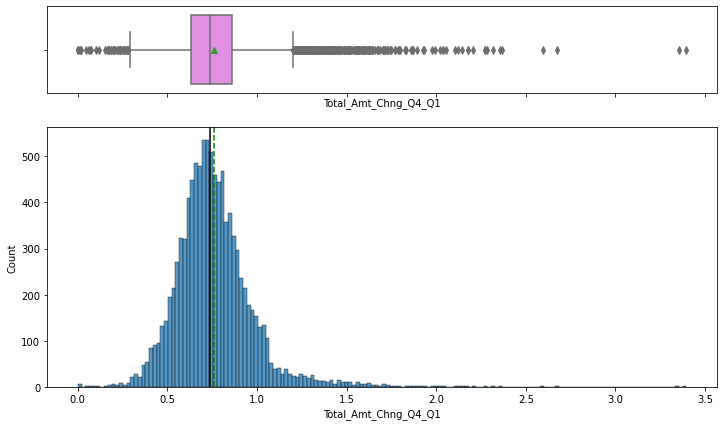

In [41]:
histogram_boxplot(ccdata, "Total_Amt_Chng_Q4_Q1")

- Total amount change has a very beautiful normal distribution, except a few outliers beyond the value of 2.0

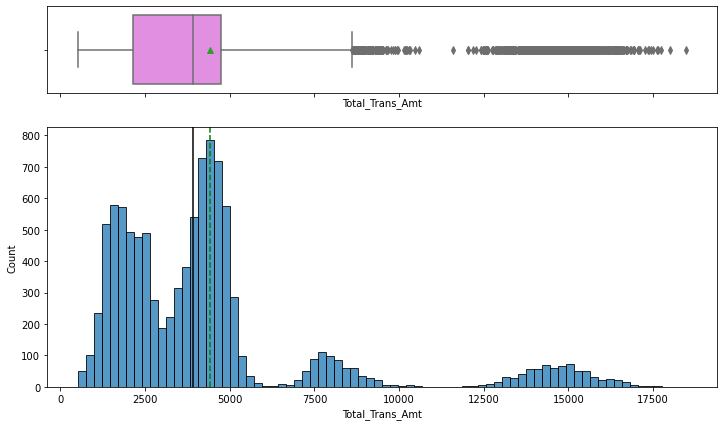

In [42]:
histogram_boxplot(ccdata, "Total_Trans_Amt")

- Total transaction amound has a very interesting distribution, as there are multiple peaks and valleys along the x axis

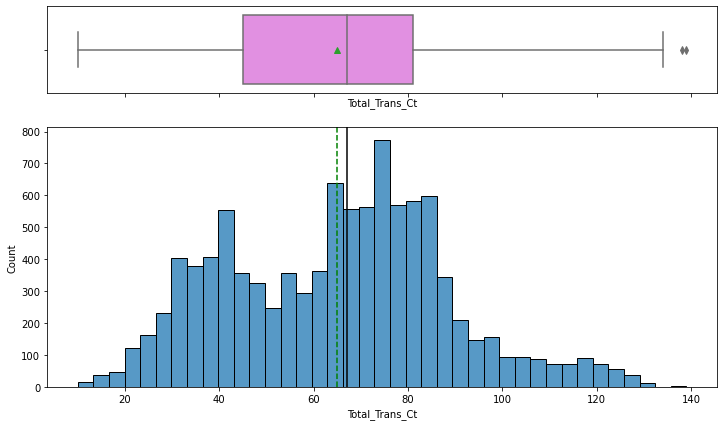

In [43]:
histogram_boxplot(ccdata, "Total_Trans_Ct")

- Total transaction count is fairly normally distributed

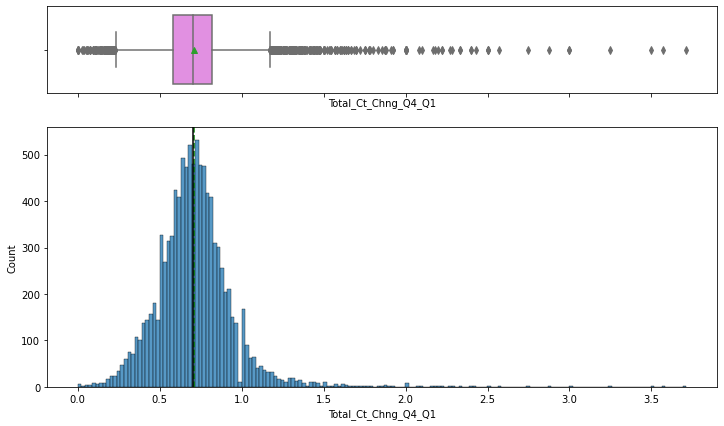

In [44]:
histogram_boxplot(ccdata, "Total_Ct_Chng_Q4_Q1")

- the total count change follows a similar distribution to total amount change. We will evaluate the relationship between these two variables.

# Bivariate Analysis

In [45]:
#ccdata.info()

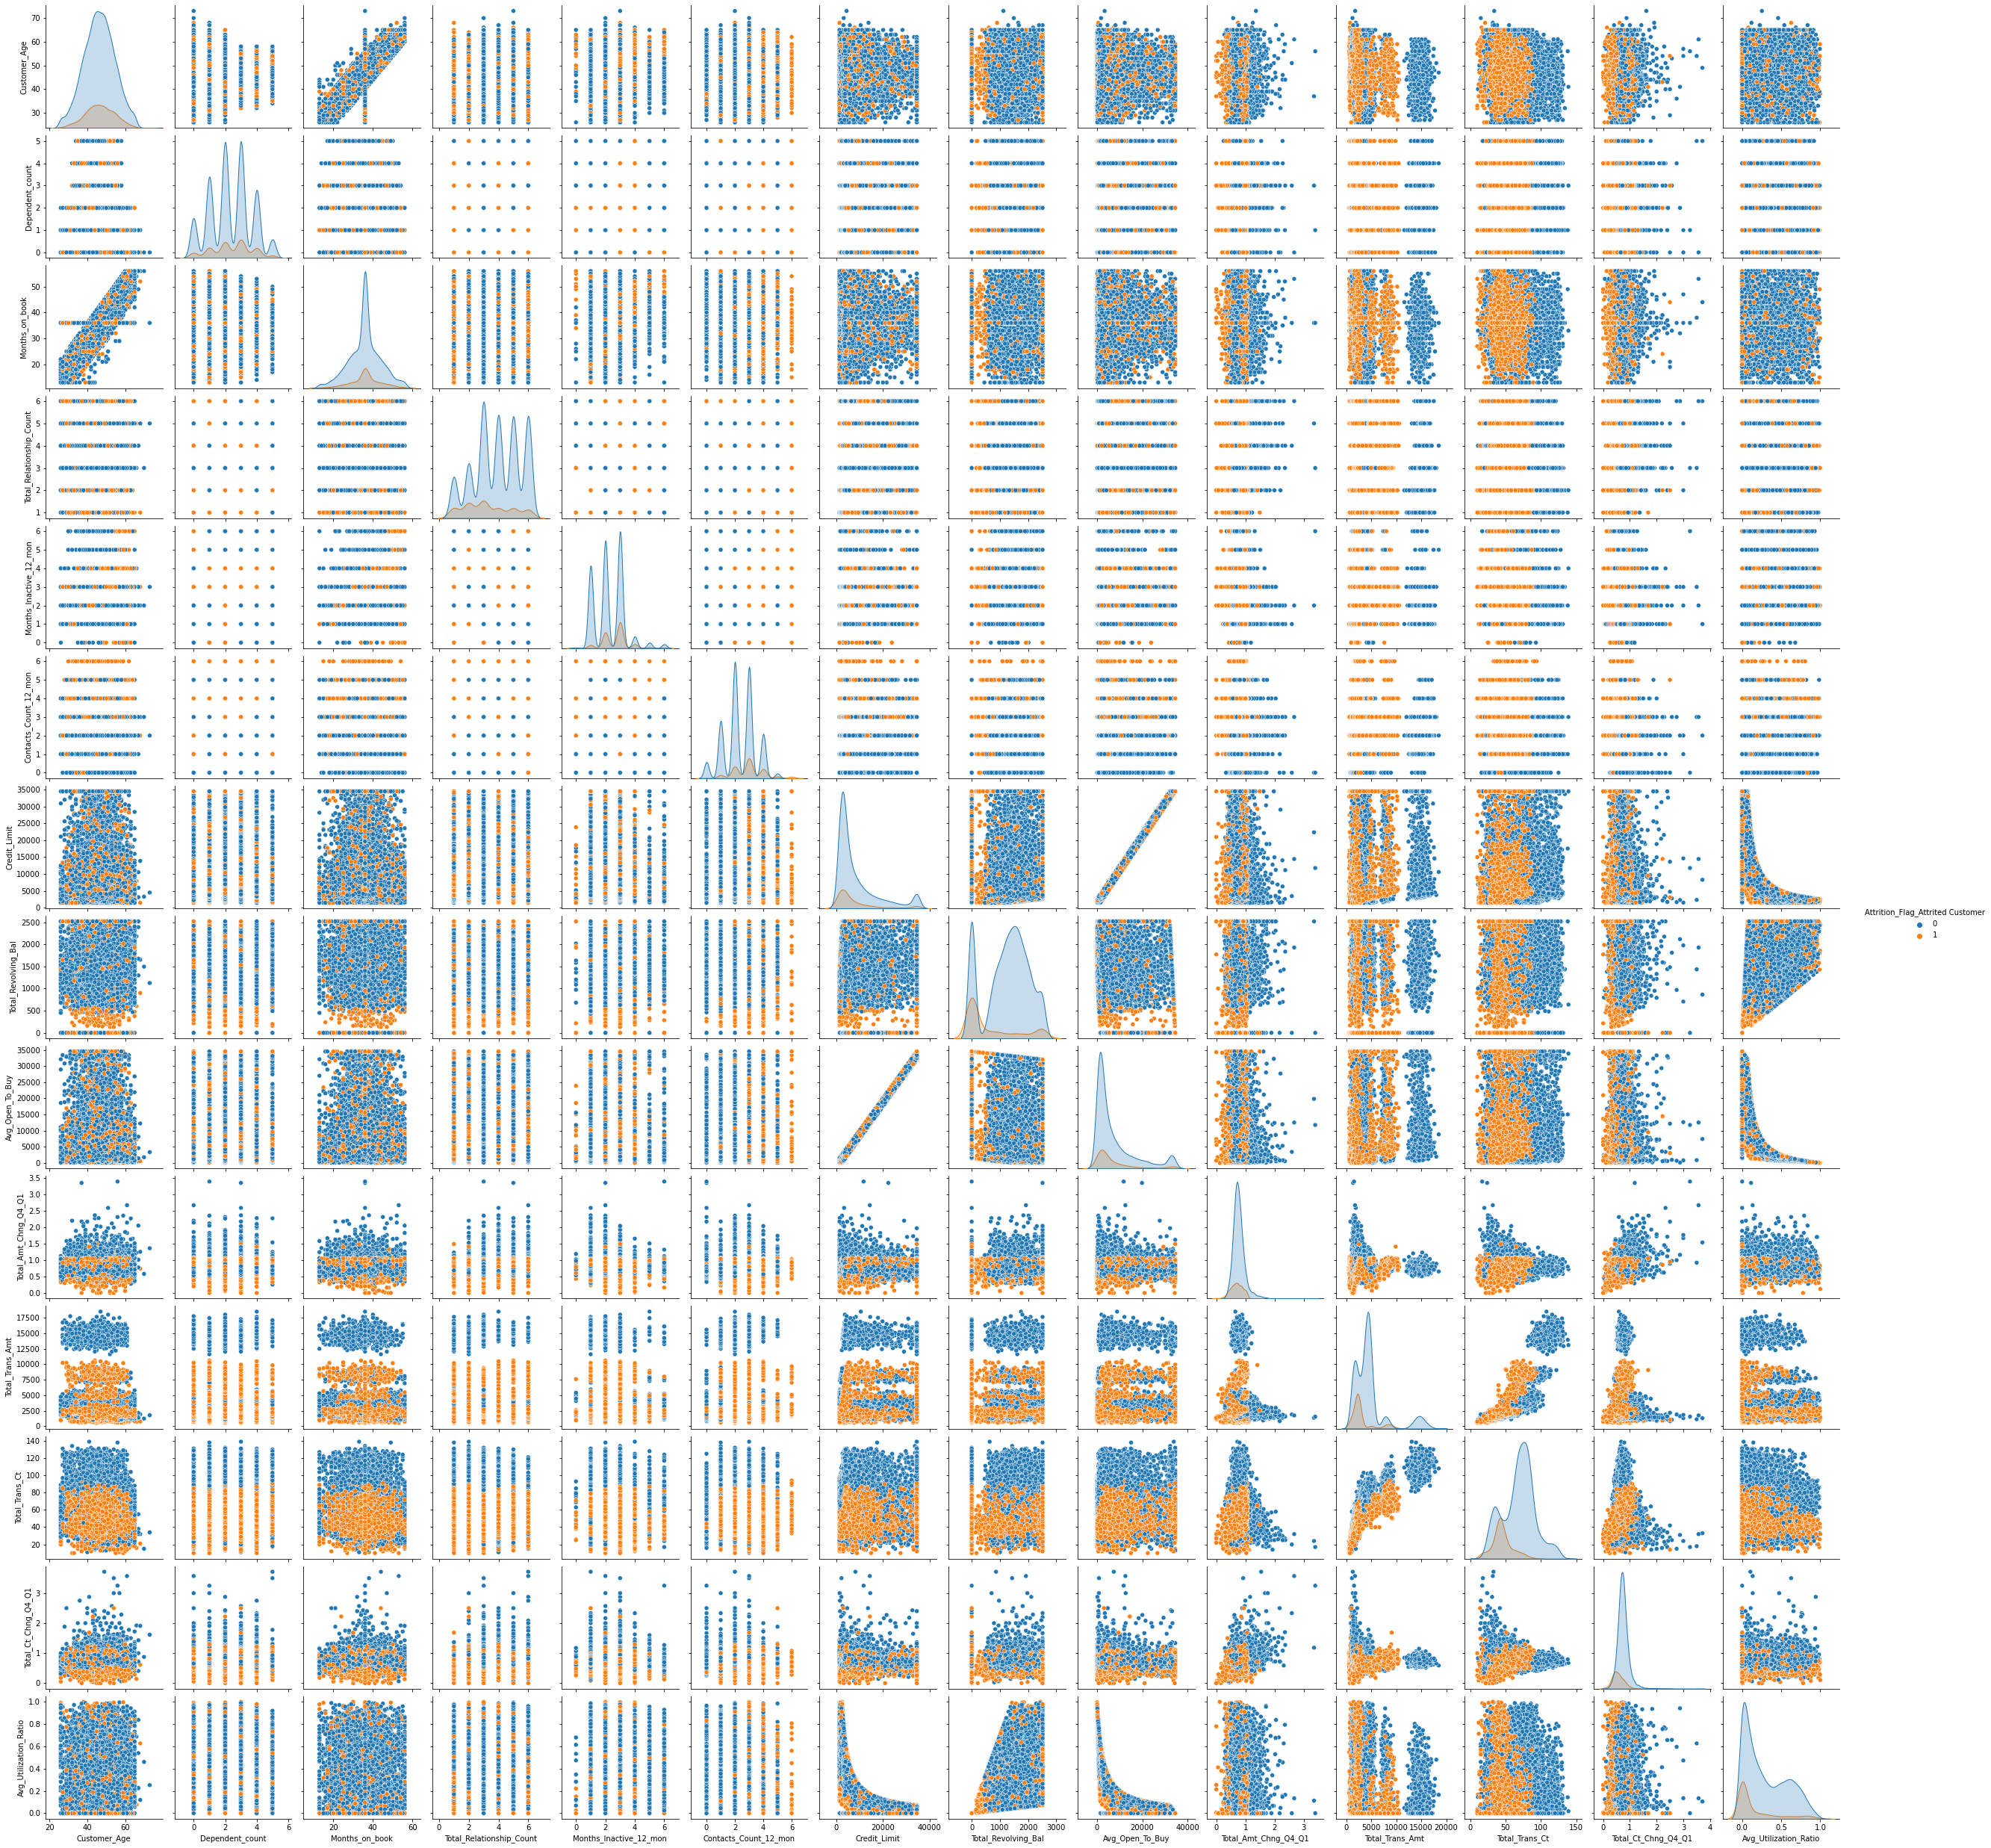

In [46]:
sns.pairplot(ccdata, hue="Attrition_Flag_Attrited Customer")

- There do appear to be strong relationships between some of the transactional patterns and the attrition outcomes
- I would expect that transactional counts and transactional amounts be strongest predictors of attrition

In [47]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

Attrition_Flag_Attrited Customer     0     1    All
Gender                                             
All                               8500  1627  10127
F                                 4428   930   5358
M                                 4072   697   4769
------------------------------------------------------------------------------------------------------------------------


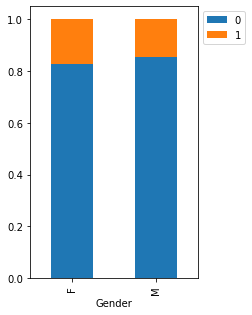

In [48]:
stacked_barplot(ccdata, "Gender", "Attrition_Flag_Attrited Customer")

- Females may be slightly more likely to atrit, but it is not a strong effect

Attrition_Flag_Attrited Customer     0     1    All
Dependent_count                                    
All                               8500  1627  10127
3                                 2250   482   2732
2                                 2238   417   2655
1                                 1569   269   1838
4                                 1314   260   1574
0                                  769   135    904
5                                  360    64    424
------------------------------------------------------------------------------------------------------------------------


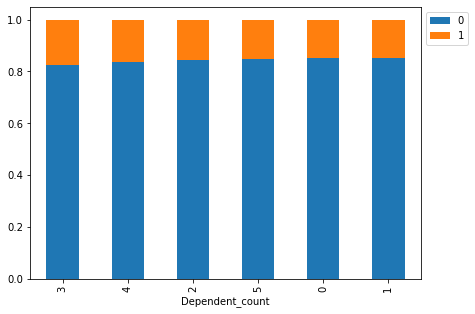

In [49]:
stacked_barplot(ccdata, "Dependent_count", "Attrition_Flag_Attrited Customer")

- Those with 3 or 4 dependents may be slightly more likely to attrit but it is not a strong effect

Attrition_Flag_Attrited Customer     0     1   All
Education_Level                                   
All                               7237  1371  8608
Graduate                          2641   487  3128
High School                       1707   306  2013
Uneducated                        1250   237  1487
College                            859   154  1013
Doctorate                          356    95   451
Post-Graduate                      424    92   516
------------------------------------------------------------------------------------------------------------------------


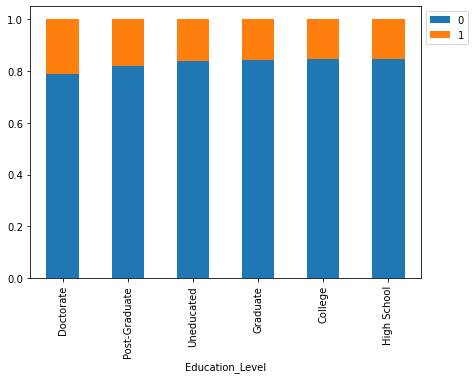

In [50]:
stacked_barplot(ccdata, "Education_Level", "Attrition_Flag_Attrited Customer")

- There does appear to be a stronger relationship with attrition for those with post-graduate or doctorate degrees

Attrition_Flag_Attrited Customer     0     1   All
Marital_Status                                    
All                               7880  1498  9378
Married                           3978   709  4687
Single                            3275   668  3943
Divorced                           627   121   748
------------------------------------------------------------------------------------------------------------------------


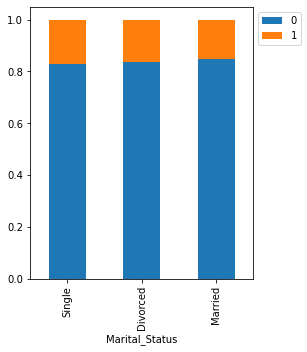

In [51]:
stacked_barplot(ccdata, "Marital_Status", "Attrition_Flag_Attrited Customer")

- Marital status does not appear to impact attrition

Attrition_Flag_Attrited Customer     0     1    All
Income_Category                                    
All                               8500  1627  10127
Less than $40K                    2949   612   3561
$40K - $60K                       1519   271   1790
$80K - $120K                      1293   242   1535
$60K - $80K                       1213   189   1402
abc                                925   187   1112
$120K +                            601   126    727
------------------------------------------------------------------------------------------------------------------------


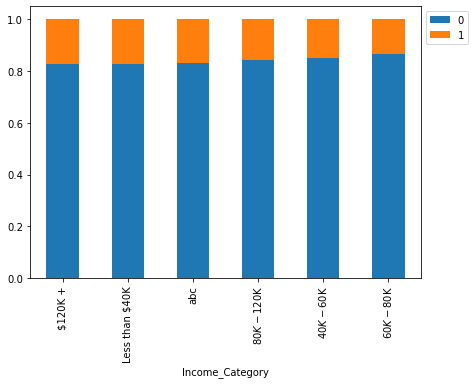

In [52]:
stacked_barplot(ccdata, "Income_Category", "Attrition_Flag_Attrited Customer")

- Those with incomes for 40k-80k are slightly less likely to attrit
- Income of ABC is similar to <$40k, which is the most common and would be used for missing value imputation

Attrition_Flag_Attrited Customer     0     1    All
Card_Category                                      
All                               8500  1627  10127
Blue                              7917  1519   9436
Silver                             473    82    555
Gold                                95    21    116
Platinum                            15     5     20
------------------------------------------------------------------------------------------------------------------------


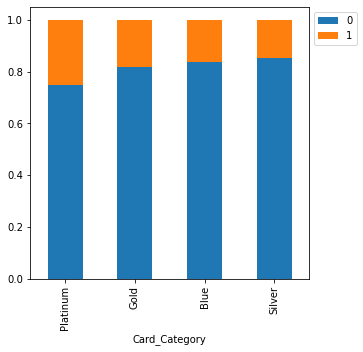

In [53]:
stacked_barplot(ccdata, "Card_Category", "Attrition_Flag_Attrited Customer")

- Those with platinum and gold cards are more likely to attrit
- Given the strong correlation between platinum type card and likelihood to attrit we will want to keep this group separated, if the model can handle such low counts
- In the proposal to the customer care team, we will want to ensure these card owners are treated uniquely and with special care so reduce attrition, if the company is earning from their accounts

<AxesSubplot:xlabel='Attrition_Flag_Attrited Customer', ylabel='Customer_Age'>

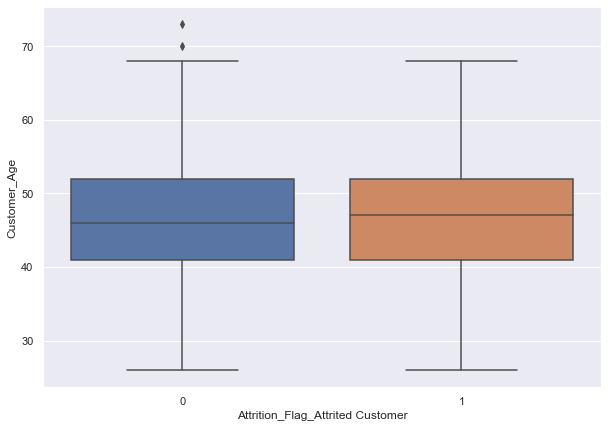

In [54]:
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(x="Attrition_Flag_Attrited Customer", y="Customer_Age", data=ccdata, orient="vertical")

- Age does not appear to be strongly correlated with attrition

<AxesSubplot:xlabel='Attrition_Flag_Attrited Customer', ylabel='Months_on_book'>

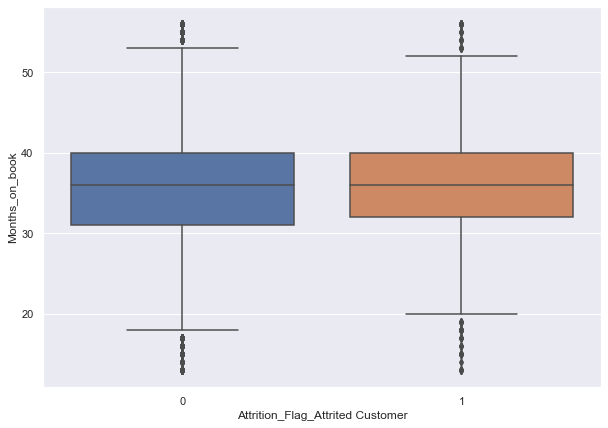

In [55]:
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(x="Attrition_Flag_Attrited Customer", y="Months_on_book", data=ccdata, orient="vertical")

- Months on book does not appear to be strongly related to attrition

<AxesSubplot:xlabel='Attrition_Flag_Attrited Customer', ylabel='Total_Relationship_Count'>

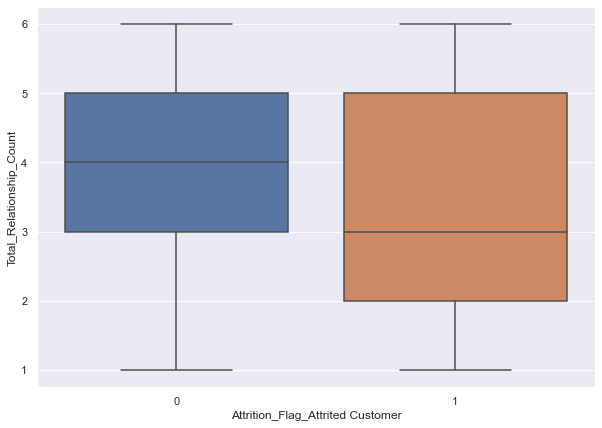

In [56]:
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(x="Attrition_Flag_Attrited Customer", y="Total_Relationship_Count", data=ccdata, orient="vertical")

- Those customers who have more accounts with the bank are less likely to attrit

<AxesSubplot:xlabel='Attrition_Flag_Attrited Customer', ylabel='Months_Inactive_12_mon'>

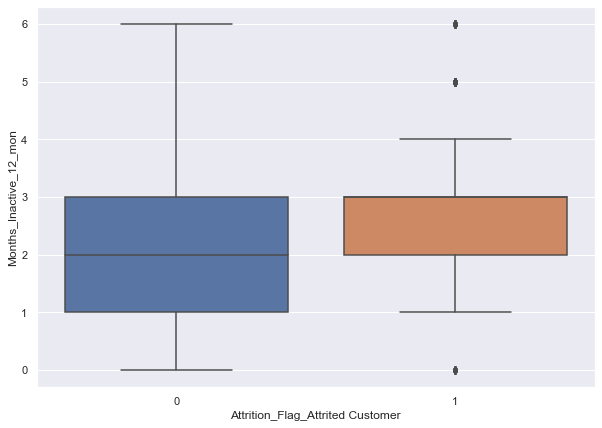

In [57]:
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(x="Attrition_Flag_Attrited Customer", y="Months_Inactive_12_mon", data=ccdata, orient="vertical")


- Customers who attrited have a slightly higher average number of months inactive than those who did not attrit
- If there is 2 months inactive it is likely that we would want customer representatives to reach out to the customer to take some type of action to reduce likelihood of attrition

<AxesSubplot:xlabel='Attrition_Flag_Attrited Customer', ylabel='Contacts_Count_12_mon'>

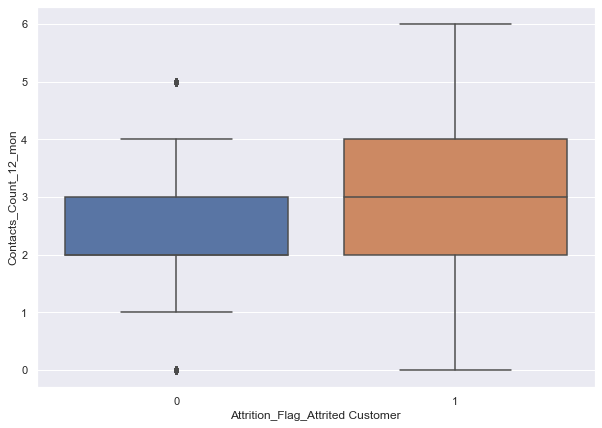

In [58]:
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(x="Attrition_Flag_Attrited Customer", y="Contacts_Count_12_mon", data=ccdata, orient="vertical")

 

- Customers who attrited has slightly more contacts with the bank than those that did not
- It would be intersting to see if we could get some type of information on the nature of these contacts, for example using NLP and sentiment analysis can we determine if these contacts were positive experiences or negative experiences?

<AxesSubplot:xlabel='Attrition_Flag_Attrited Customer', ylabel='Credit_Limit'>

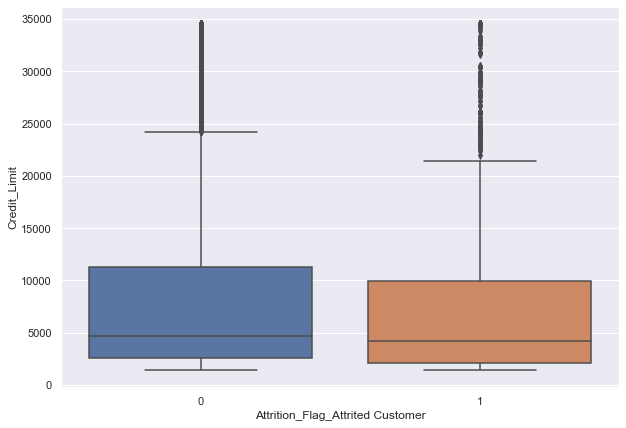

In [59]:
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(x="Attrition_Flag_Attrited Customer", y="Credit_Limit", data=ccdata, orient="vertical")

 

- Credit limits appeared to be similar between customers who attrited and those who did not

<AxesSubplot:xlabel='Attrition_Flag_Attrited Customer', ylabel='Total_Revolving_Bal'>

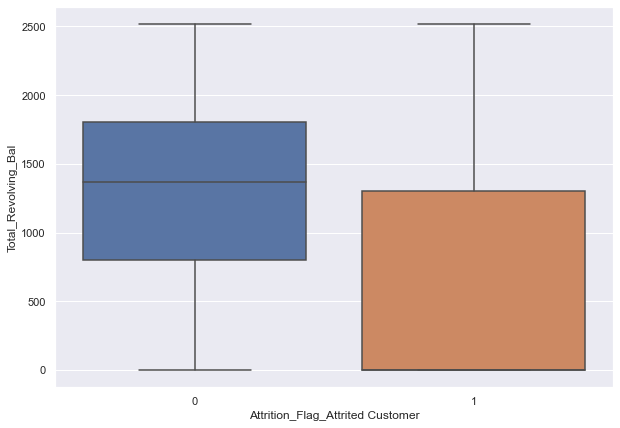

In [60]:
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(x="Attrition_Flag_Attrited Customer", y="Total_Revolving_Bal", data=ccdata, orient="vertical")

 

- Customers who attrited tended to have lower revolving balances on their credit cards
- This is intuitive, as if you have a balance on your credit card you cannot cancel the service, the card must be paid down in order to close it
- It may be helpful in the future to evaluate time series patterns of revolving balance, for example if someone holds a high balance then begins to pay it down they may be likely to close their account

<AxesSubplot:xlabel='Attrition_Flag_Attrited Customer', ylabel='Avg_Open_To_Buy'>

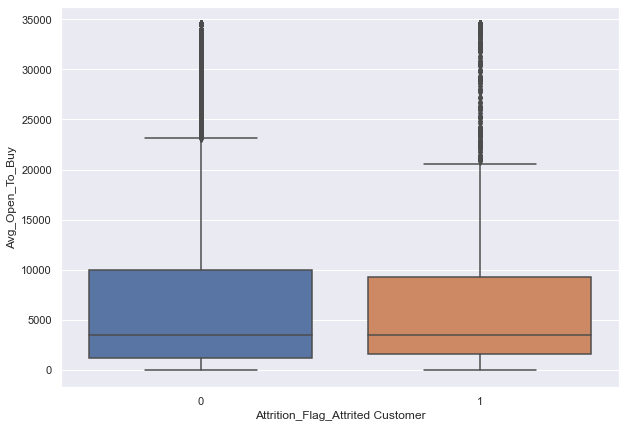

In [61]:
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(x="Attrition_Flag_Attrited Customer", y="Avg_Open_To_Buy", data=ccdata, orient="vertical")

- Average open to buy didnot differ greatly between customers who attrited and those who did not

<AxesSubplot:xlabel='Attrition_Flag_Attrited Customer', ylabel='Total_Amt_Chng_Q4_Q1'>

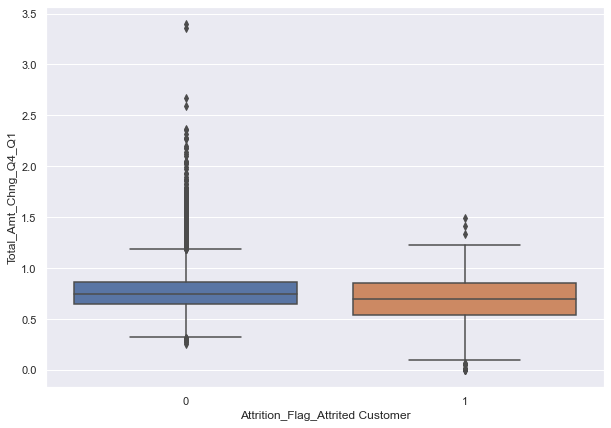

In [62]:
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(x="Attrition_Flag_Attrited Customer", y="Total_Amt_Chng_Q4_Q1", data=ccdata, orient="vertical")

 

- Total amount change does not differ greatly between customers who attrited and those who did not

<AxesSubplot:xlabel='Attrition_Flag_Attrited Customer', ylabel='Total_Trans_Amt'>

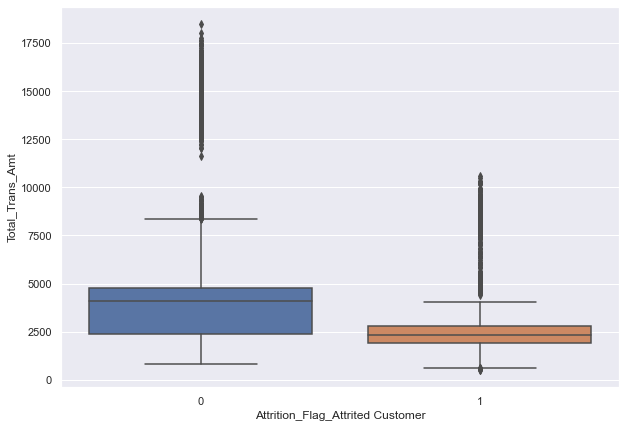

In [63]:
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(x="Attrition_Flag_Attrited Customer", y="Total_Trans_Amt", data=ccdata, orient="vertical")

- Total transaction amount over the last 12 months was lower for those who attritted

<AxesSubplot:xlabel='Attrition_Flag_Attrited Customer', ylabel='Total_Trans_Ct'>

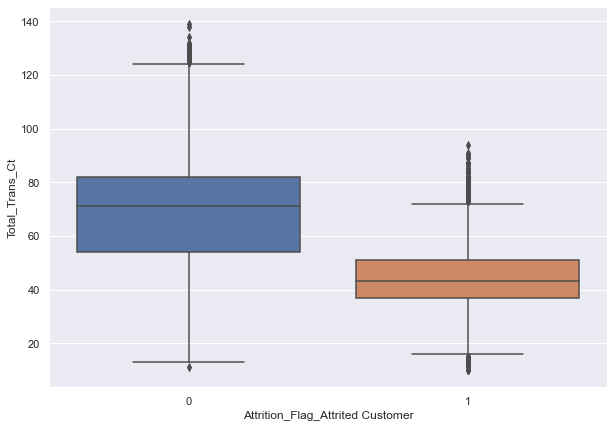

In [64]:
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(x="Attrition_Flag_Attrited Customer", y="Total_Trans_Ct", data=ccdata, orient="vertical")


- Total transaction count over the last 12 months was lower for those who attritted

<AxesSubplot:xlabel='Attrition_Flag_Attrited Customer', ylabel='Total_Ct_Chng_Q4_Q1'>

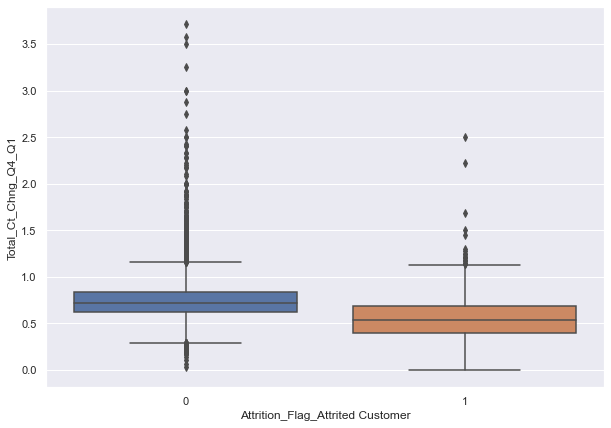

In [65]:
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(x="Attrition_Flag_Attrited Customer", y="Total_Ct_Chng_Q4_Q1", data=ccdata, orient="vertical")

 

- Total transaction count change from Q1 to Q4 is lower for those who attritted

<AxesSubplot:xlabel='Attrition_Flag_Attrited Customer', ylabel='Avg_Utilization_Ratio'>

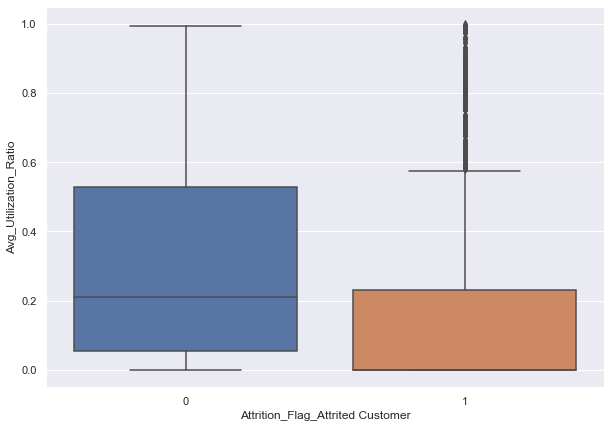

In [66]:
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(x="Attrition_Flag_Attrited Customer", y="Avg_Utilization_Ratio", data=ccdata, orient="vertical")

- Utilization ratio was lower for those who attritted and those who did not

In [67]:
#plt.figure(figsize=(15, 7))
#sns.heatmap(ccdata.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
#plt.show()

- Age and months are book are very strongly postiviely correlated at +0.79
- Utilization ratio and revolving balance are strongly postively correlated at +0.62
- Credit limit is both negatively correlated with utilization ratio (-0.48)
- Credit limit is both negatively correlated with average open to buy (-0.54)
- Credit limit and average open to buy appear to be directly correlated with one another (+1.0). They also show very similar correlations with all other variables. I would recommend dropping credit limit and only keeping average open to buy.
- Total transaction amount and total transaction count are very strongly correlated (+0.81)


Notes on data preparation as a result of EDA:
- Card category - should we group blue/not blue - no, because there is a distinct relationship with platinum or gold and attrition rate
- Income - should we make this values instead - seems okay to keep as categorical, there is a lower likelyhood of attrition with middle values
- Education - should we make this ordinal categorical variable - could consider grouping as post-graduate or not
- Missing value treatment for education and marital status is needed
- Missing value treatment for income of "abc" is needed
- Drop credit limit and only keep average open to buy. Do not keep both.

# Feature engineering

In [68]:
#change 'abc' in income to nan to allow for imputation of missing values
ccdata['Income_Category'].replace('abc', np.NaN,inplace=True)

In [69]:
ccdata['Income_Category'].value_counts(dropna=False)

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
NaN               1112
$120K +            727
Name: Income_Category, dtype: int64

In [70]:
ccdata['Education_Level'].value_counts(dropna=False)

Graduate         3128
High School      2013
NaN              1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

Given the patterns with post-graduate and doctorate degrees versus lower levels of education attained, I chose to group this into a binary variable for simplification

In [71]:
ccdata.replace(to_replace="Graduate",value="<=Graduate",inplace=True)
ccdata.replace(to_replace="High School",value="<=Graduate",inplace=True)
ccdata.replace(to_replace="Uneducated",value="<=Graduate",inplace=True)
ccdata.replace(to_replace="College",value="<=Graduate",inplace=True)
ccdata.replace(to_replace="Post-Graduate",value="Post-Graduate",inplace=True)
ccdata.replace(to_replace="Doctorate",value="Post-Graduate",inplace=True)

In [72]:
ccdata['Education_Level'].value_counts(dropna=False)

<=Graduate       7641
NaN              1519
Post-Graduate     967
Name: Education_Level, dtype: int64

In [73]:
ccdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   Customer_Age                      10127 non-null  int64   
 1   Gender                            10127 non-null  category
 2   Dependent_count                   10127 non-null  int64   
 3   Education_Level                   8608 non-null   category
 4   Marital_Status                    9378 non-null   category
 5   Income_Category                   9015 non-null   category
 6   Card_Category                     10127 non-null  category
 7   Months_on_book                    10127 non-null  int64   
 8   Total_Relationship_Count          10127 non-null  int64   
 9   Months_Inactive_12_mon            10127 non-null  int64   
 10  Contacts_Count_12_mon             10127 non-null  int64   
 11  Credit_Limit                      10127 non-null  floa

# Split data

Split data into test, train, and validation datasets

Avoid data leakage when modifying data to account for missing values

In [74]:
#drop credit limit due to high correlation with avg open to buy
X = ccdata.drop(["Attrition_Flag_Attrited Customer","Credit_Limit"], axis=1)
y = ccdata["Attrition_Flag_Attrited Customer"]

In [75]:
# Splitting data into training, validation and test sets:
# first we split data into 2 parts, say temporary and test

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)

(6075, 18) (2026, 18) (2026, 18)


In [76]:
#evaluate counts prior to imputation
X_train['Income_Category'].value_counts(dropna=False)

Less than $40K    2129
$40K - $60K       1059
$80K - $120K       953
$60K - $80K        831
NaN                654
$120K +            449
Name: Income_Category, dtype: int64

In [77]:
X_val["Education_Level"].value_counts(dropna=False)

<=Graduate       1532
NaN               294
Post-Graduate     200
Name: Education_Level, dtype: int64

In [78]:
X_test["Marital_Status"].value_counts(dropna=False)

Married     908
Single      804
Divorced    162
NaN         152
Name: Marital_Status, dtype: int64

In [79]:
# Let's impute the missing values
imp_mode = SimpleImputer(missing_values=np.nan, strategy="most_frequent")

# fit the imputer on train data and transform the train data
X_train["Income_Category"] = imp_mode.fit_transform(X_train[["Income_Category"]])

# transform the validation and test data using the imputer fit on train data
X_val["Income_Category"] = imp_mode.transform(X_val[["Income_Category"]])

X_test["Income_Category"] = imp_mode.transform(X_test[["Income_Category"]])


In [80]:
# Let's impute the missing values
imp_mode = SimpleImputer(missing_values=np.nan, strategy="most_frequent")

# fit the imputer on train data and transform the train data
X_train["Education_Level"] = imp_mode.fit_transform(X_train[["Education_Level"]])

# transform the validation and test data using the imputer fit on train data
X_val["Education_Level"] = imp_mode.transform(X_val[["Education_Level"]])

X_test["Education_Level"] = imp_mode.transform(X_test[["Education_Level"]])

In [81]:
# Let's impute the missing values
imp_mode = SimpleImputer(missing_values=np.nan, strategy="most_frequent")

# fit the imputer on train data and transform the train data
X_train["Marital_Status"] = imp_mode.fit_transform(X_train[["Marital_Status"]])

# transform the validation and test data using the imputer fit on train data
X_val["Marital_Status"] = imp_mode.transform(X_val[["Marital_Status"]])

X_test["Marital_Status"] = imp_mode.transform(X_test[["Marital_Status"]])

After imputing missing values, we need to ensure the code ran sucessfully and as intended

In [82]:
#ensuring missing value imputation was sucessful
X_train['Income_Category'].value_counts(dropna=False)

Less than $40K    2783
$40K - $60K       1059
$80K - $120K       953
$60K - $80K        831
$120K +            449
Name: Income_Category, dtype: int64

In [83]:
X_val["Education_Level"].value_counts(dropna=False)

<=Graduate       1826
Post-Graduate     200
Name: Education_Level, dtype: int64

In [84]:
X_test["Marital_Status"].value_counts(dropna=False)

Married     1060
Single       804
Divorced     162
Name: Marital_Status, dtype: int64

Verify there are no more missing values in any of the datasets

In [85]:
X_train.isnull().sum()

Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [86]:
X_val.isnull().sum()

Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [87]:
X_test.isnull().sum()

Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

Create dummy variables and drop the most frequent level to aid in model stability

In [88]:
# Creating dummy variables for categorical variables
# we want to control the reference level so the models are stable
X_train = pd.get_dummies(data=X_train, drop_first=False)
X_val = pd.get_dummies(data=X_val, drop_first=False)
X_test = pd.get_dummies(data=X_test, drop_first=False)

In [89]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6075 entries, 800 to 4035
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Customer_Age                    6075 non-null   int64  
 1   Dependent_count                 6075 non-null   int64  
 2   Months_on_book                  6075 non-null   int64  
 3   Total_Relationship_Count        6075 non-null   int64  
 4   Months_Inactive_12_mon          6075 non-null   int64  
 5   Contacts_Count_12_mon           6075 non-null   int64  
 6   Total_Revolving_Bal             6075 non-null   int64  
 7   Avg_Open_To_Buy                 6075 non-null   float64
 8   Total_Amt_Chng_Q4_Q1            6075 non-null   float64
 9   Total_Trans_Amt                 6075 non-null   int64  
 10  Total_Trans_Ct                  6075 non-null   int64  
 11  Total_Ct_Chng_Q4_Q1             6075 non-null   float64
 12  Avg_Utilization_Ratio           

In [90]:
X_train = X_train.drop(["Gender_F","Education_Level_<=Graduate","Marital_Status_Married","Income_Category_Less than $40K","Card_Category_Blue"], axis=1)
X_test = X_test.drop(["Gender_F","Education_Level_<=Graduate","Marital_Status_Married","Income_Category_Less than $40K","Card_Category_Blue"], axis=1)
X_val = X_val.drop(["Gender_F","Education_Level_<=Graduate","Marital_Status_Married","Income_Category_Less than $40K","Card_Category_Blue"], axis=1)

In [91]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6075 entries, 800 to 4035
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer_Age                   6075 non-null   int64  
 1   Dependent_count                6075 non-null   int64  
 2   Months_on_book                 6075 non-null   int64  
 3   Total_Relationship_Count       6075 non-null   int64  
 4   Months_Inactive_12_mon         6075 non-null   int64  
 5   Contacts_Count_12_mon          6075 non-null   int64  
 6   Total_Revolving_Bal            6075 non-null   int64  
 7   Avg_Open_To_Buy                6075 non-null   float64
 8   Total_Amt_Chng_Q4_Q1           6075 non-null   float64
 9   Total_Trans_Amt                6075 non-null   int64  
 10  Total_Trans_Ct                 6075 non-null   int64  
 11  Total_Ct_Chng_Q4_Q1            6075 non-null   float64
 12  Avg_Utilization_Ratio          6075 non-null  

In [92]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2026 entries, 9760 to 413
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer_Age                   2026 non-null   int64  
 1   Dependent_count                2026 non-null   int64  
 2   Months_on_book                 2026 non-null   int64  
 3   Total_Relationship_Count       2026 non-null   int64  
 4   Months_Inactive_12_mon         2026 non-null   int64  
 5   Contacts_Count_12_mon          2026 non-null   int64  
 6   Total_Revolving_Bal            2026 non-null   int64  
 7   Avg_Open_To_Buy                2026 non-null   float64
 8   Total_Amt_Chng_Q4_Q1           2026 non-null   float64
 9   Total_Trans_Amt                2026 non-null   int64  
 10  Total_Trans_Ct                 2026 non-null   int64  
 11  Total_Ct_Chng_Q4_Q1            2026 non-null   float64
 12  Avg_Utilization_Ratio          2026 non-null  

In [93]:
X_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2026 entries, 2894 to 6319
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer_Age                   2026 non-null   int64  
 1   Dependent_count                2026 non-null   int64  
 2   Months_on_book                 2026 non-null   int64  
 3   Total_Relationship_Count       2026 non-null   int64  
 4   Months_Inactive_12_mon         2026 non-null   int64  
 5   Contacts_Count_12_mon          2026 non-null   int64  
 6   Total_Revolving_Bal            2026 non-null   int64  
 7   Avg_Open_To_Buy                2026 non-null   float64
 8   Total_Amt_Chng_Q4_Q1           2026 non-null   float64
 9   Total_Trans_Amt                2026 non-null   int64  
 10  Total_Trans_Ct                 2026 non-null   int64  
 11  Total_Ct_Chng_Q4_Q1            2026 non-null   float64
 12  Avg_Utilization_Ratio          2026 non-null 

## Model evaluation criterion

### Define TP, TN, FP, FN
* The target variable is attrition yes/no
* Positive (1) indicates attrition occured
* Negative (0) indicates attrition did not occur
* True positive - attrition predicted and attrition did occur
* Ture negative - atttrition not predicted and attrition did not occur
* False positive - attrition predicted and attrition did not occur (this is ok)
* False negative - attrition not predicted and attriton did occur (this is bad)

### Company could face 2 types of losses
1. Could take action to prevent attrition when there is no risk - Loss of investment in time/money/resources when applying retention strategies when such strategies are not warranted
2. Do not take action in the form of retention strategies for those that truly are at risk of attrition - Loss of future income due to attrition or closing credit card account

### Which Loss is greater? 
* False negative is greater loss i.e Predicting a person not at risk, while actually person is at risk of attrition. 

### How to reduce this loss i.e need to reduce False Negatives?
* Company wants recall to be maximized i.e. we need to reduce the number of false negatives.

# Oversampling Data with SMOTE

Create oversampling  dataset for model building and performance evaluation

In [94]:
print("Before UpSampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before UpSampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After UpSampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After UpSampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After UpSampling, the shape of train_X: {}".format(X_train_over.shape))
print("After UpSampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before UpSampling, counts of label 'Yes': 976
Before UpSampling, counts of label 'No': 5099 

After UpSampling, counts of label 'Yes': 5099
After UpSampling, counts of label 'No': 5099 

After UpSampling, the shape of train_X: (10198, 24)
After UpSampling, the shape of train_y: (10198,) 



# Undersampling data

Create undersampling dataset for model building and performance evaluation

In [95]:
rus = RandomUnderSampler(random_state=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [96]:
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 976
Before Under Sampling, counts of label 'No': 5099 

After Under Sampling, counts of label 'Yes': 976
After Under Sampling, counts of label 'No': 976 

After Under Sampling, the shape of train_X: (1952, 24)
After Under Sampling, the shape of train_y: (1952,) 



In [97]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

The following 6 models will be built using the original dataset, an oversampled dataset, and an undersampled dataset.

Model performance will be evaluated primarily on Recall, but should also consider a balance of performance with regard to accuracy, precision, and F1.

Each model will be built, performance measures will be printed, and the final comments will be available at the end of this block of code to compare all models side by side.

Models to evaluate:
- Logistic Regression
- Decision tree
- Random forest
- Bagging
- GBM
- Adaboost


## Logistic Regression

In [98]:
lr = LogisticRegression(random_state=1)
lr.fit(X_train, y_train)

LogisticRegression(random_state=1)

**Let's evaluate the model performance by using KFold and cross_val_score**

- `K-Folds cross-validation` provides dataset indices to split data into train/validation sets. Split dataset into k consecutive stratified folds (without shuffling by default). Each fold is then used once as validation while the k - 1 remaining folds form the training set.

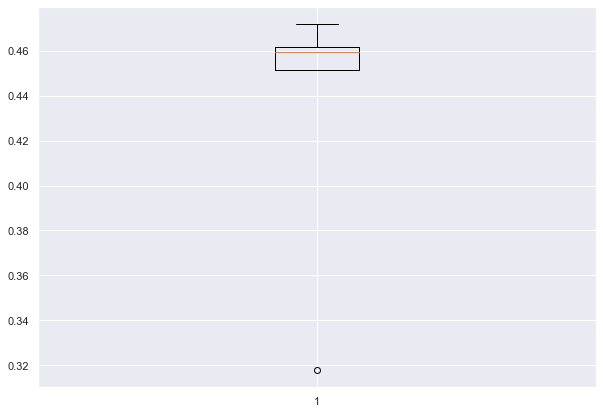

In [99]:
scoring = "recall"
kfold = StratifiedKFold(
    n_splits=5, shuffle=True, random_state=1
)  # Setting number of splits equal to 5
cv_result_bfr = cross_val_score(
    estimator=lr, X=X_train, y=y_train, scoring=scoring, cv=kfold
)
# Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_bfr)
plt.show()

* Performance on training set varies between 0.46 to 0.46 recall.
* Let's check the performance on validation data.

In [100]:
# Calculating different metrics on train set
log_reg_model_train_perf = model_performance_classification_sklearn(
    lr, X_train, y_train
)
print("Training performance:")
log_reg_model_train_perf

Training performance:


Accuracy  Recall  Precision    F1
0     0.887   0.505      0.707 0.589

In [101]:
# Calculating different metrics on validation set
log_reg_model_val_perf = model_performance_classification_sklearn(lr, X_val, y_val)
print("Validation performance:")
log_reg_model_val_perf

Validation performance:


Accuracy  Recall  Precision    F1
0     0.896   0.558      0.734 0.634

### Logistic Regression on oversampled data


In [102]:
log_reg_over = LogisticRegression(random_state=1)

# Training the basic logistic regression model with training set
log_reg_over.fit(X_train_over, y_train_over)

LogisticRegression(random_state=1)

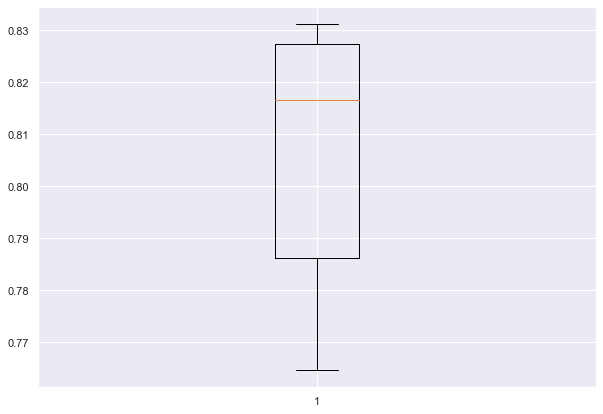

In [103]:
scoring = "recall"
kfold = StratifiedKFold(
    n_splits=5, shuffle=True, random_state=1
)  # Setting number of splits equal to 5
cv_result_over = cross_val_score(
    estimator=log_reg_over, X=X_train_over, y=y_train_over, scoring=scoring, cv=kfold
)
# Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_over)
plt.show()

In [104]:
# Calculating different metrics on train set
log_reg_over_train_perf = model_performance_classification_sklearn(
    log_reg_over, X_train_over, y_train_over
)
print("Training performance:")
log_reg_over_train_perf

Training performance:


Accuracy  Recall  Precision    F1
0     0.804   0.824      0.793 0.808

In [105]:
# Calculating different metrics on validation set
log_reg_over_val_perf = model_performance_classification_sklearn(
    log_reg_over, X_val, y_val
)
print("validation performance:")
log_reg_over_val_perf

validation performance:


Accuracy  Recall  Precision    F1
0     0.793   0.847      0.428 0.568

### Logistic Regression on undersampled data

In [106]:
log_reg_under = LogisticRegression(random_state=1)
log_reg_under.fit(X_train_un, y_train_un)

LogisticRegression(random_state=1)

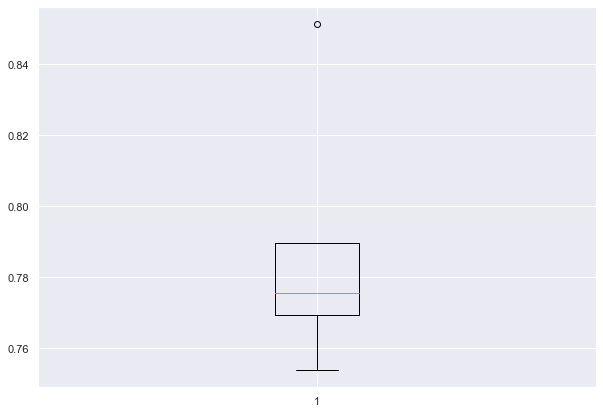

In [107]:
scoring = "recall"
kfold = StratifiedKFold(
    n_splits=5, shuffle=True, random_state=1
)  # Setting number of splits equal to 5
cv_result_under = cross_val_score(
    estimator=log_reg_under, X=X_train_un, y=y_train_un, scoring=scoring, cv=kfold
)
# Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_under)
plt.show()

In [108]:
# Calculating different metrics on train set
log_reg_under_train_perf = model_performance_classification_sklearn(
    log_reg_under, X_train_un, y_train_un
)
print("Training performance:")
log_reg_under_train_perf

Training performance:


Accuracy  Recall  Precision    F1
0     0.815   0.821      0.811 0.816

In [109]:
# Calculating different metrics on validation set
log_reg_under_val_perf = model_performance_classification_sklearn(
    log_reg_under, X_val, y_val
)
print("Validation performance:")
log_reg_under_val_perf

Validation performance:


Accuracy  Recall  Precision    F1
0     0.813   0.834      0.456 0.589

In [110]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_over_train_perf.T,
        log_reg_under_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression",
    "Logistic Regression with oversampled data",
    "Logistic Regression with undersampled data",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Logistic Regression  Logistic Regression with oversampled data  \
Accuracy                 0.887                                      0.804   
Recall                   0.505                                      0.824   
Precision                0.707                                      0.793   
F1                       0.589                                      0.808   

           Logistic Regression with undersampled data  
Accuracy                                        0.815  
Recall                                          0.821  
Precision                                       0.811  
F1                                              0.816

The logistic regression model performed fairly well on the training dataset with oversampled and undersampled data

In [111]:
# Validation performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_val_perf.T,
        log_reg_over_val_perf.T,
        log_reg_under_val_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression",
    "Logistic Regression with oversampled data",
    "Logistic Regression with undersampled data",
]
print("Validation performance comparison:")
models_train_comp_df

Validation performance comparison:


Logistic Regression  Logistic Regression with oversampled data  \
Accuracy                 0.896                                      0.793   
Recall                   0.558                                      0.847   
Precision                0.734                                      0.428   
F1                       0.634                                      0.568   

           Logistic Regression with undersampled data  
Accuracy                                        0.813  
Recall                                          0.834  
Precision                                       0.456  
F1                                              0.589

The logistic regression model perfomance doesn't look strong as the precision and F1 are fairly low even when the recall and accuracy are high - we should try more models

# Decision Tree

## Decision tree - original data

In [112]:
#Fitting the model
d_tree = DecisionTreeClassifier(random_state=1)
d_tree.fit(X_train,y_train)

#Calculating different metrics
dtree_model_train_perf=model_performance_classification_sklearn(d_tree,X_train,y_train)
print("DT Training performance:\n",dtree_model_train_perf)
dtree_model_val_perf=model_performance_classification_sklearn(d_tree,X_val,y_val)
print("DT Validation performance:\n",dtree_model_val_perf)
#Creating confusion matrix
#confusion_matrix_sklearn(d_tree, X_test, y_test)

DT Training performance:
    Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000
DT Validation performance:
    Accuracy  Recall  Precision    F1
0     0.938   0.819      0.802 0.810


## Decision Tree - Oversampled data

In [113]:
#Fitting the model
d_tree = DecisionTreeClassifier(random_state=1)
d_tree.fit(X_train_over,y_train_over)

#Calculating different metrics
dtree_model_train_perf_over=model_performance_classification_sklearn(d_tree,X_train_over,y_train_over)
print("DT Training performance oversampled:\n",dtree_model_train_perf_over)
dtree_model_val_perf_over=model_performance_classification_sklearn(d_tree,X_val,y_val)
print("DT Validation performance oversampled:\n",dtree_model_val_perf_over)
#Creating confusion matrix
#confusion_matrix_sklearn(d_tree, X_test, y_test)

DT Training performance oversampled:
    Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000
DT Validation performance oversampled:
    Accuracy  Recall  Precision    F1
0     0.924   0.798      0.747 0.772


## Decision Tree - Undersampled data

In [114]:
#Fitting the model
d_tree = DecisionTreeClassifier(random_state=1)
d_tree.fit(X_train_un,y_train_un)

#Calculating different metrics
dtree_model_train_perf_un=model_performance_classification_sklearn(d_tree,X_train_un,y_train_un)
print("DT Training performance undersampled:\n",dtree_model_train_perf_un)
dtree_model_val_perf_un=model_performance_classification_sklearn(d_tree,X_val,y_val)
print("DT Validation performance undersampled:\n",dtree_model_val_perf_un)
#Creating confusion matrix
#confusion_matrix_sklearn(d_tree, X_test, y_test)

DT Training performance undersampled:
    Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000
DT Validation performance undersampled:
    Accuracy  Recall  Precision    F1
0     0.905   0.914      0.644 0.755


# Random Forest

## Random Forest - original data

In [115]:
#Fitting the model
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

#Calculating different metrics
rf_estimator_model_train_perf=model_performance_classification_sklearn(rf_estimator,X_train,y_train)
print("RF Training performance:\n",rf_estimator_model_train_perf)
rf_estimator_model_val_perf=model_performance_classification_sklearn(rf_estimator,X_val,y_val)
print("RF Validation performance:\n",rf_estimator_model_val_perf)

#Creating confusion matrix
#confusion_matrix_sklearn(rf_estimator, x_test, y_test)

RF Training performance:
    Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000
RF Validation performance:
    Accuracy  Recall  Precision    F1
0     0.957   0.804      0.919 0.858


## Random Forest - Oversampled Data

In [116]:
#Fitting the model
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train_over,y_train_over)

#Calculating different metrics
rf_estimator_model_train_perf_over=model_performance_classification_sklearn(rf_estimator,X_train_over,y_train_over)
print("RF Training performance Oversampled:\n",rf_estimator_model_train_perf_over)
rf_estimator_model_val_perf_over=model_performance_classification_sklearn(rf_estimator,X_val,y_val)
print("RF Validation performance Oversampled:\n",rf_estimator_model_val_perf_over)

#Creating confusion matrix
#confusion_matrix_sklearn(rf_estimator, x_test, y_test)

RF Training performance Oversampled:
    Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000
RF Validation performance Oversampled:
    Accuracy  Recall  Precision    F1
0     0.954   0.883      0.837 0.860


In [117]:
#Fitting the model
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train_un,y_train_un)

#Calculating different metrics
rf_estimator_model_train_perf_un=model_performance_classification_sklearn(rf_estimator,X_train_un,y_train_un)
print("RF Training performance undersampled:\n",rf_estimator_model_train_perf_un)
rf_estimator_model_val_perf_un=model_performance_classification_sklearn(rf_estimator,X_val,y_val)
print("RF Validation performance undersampled:\n",rf_estimator_model_val_perf_un)

#Creating confusion matrix
#confusion_matrix_sklearn(rf_estimator, x_test, y_test)

RF Training performance undersampled:
    Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000
RF Validation performance undersampled:
    Accuracy  Recall  Precision    F1
0     0.932   0.939      0.722 0.816


# Bagging Classifier

## Bagging Classifier Original Dataset

In [118]:
#Fitting the model
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train,y_train)

#Calculating different metrics
bagging_classifier_model_train_perf=model_performance_classification_sklearn(bagging_classifier,X_train,y_train)
print("Bagging Training performance:\n",bagging_classifier_model_train_perf)
bagging_classifier_model_val_perf=model_performance_classification_sklearn(bagging_classifier,X_val,y_val)
print("Bagging Validation performance:\n",bagging_classifier_model_val_perf)
#Creating confusion matrix
#confusion_matrix_sklearn(bagging_classifier, x_test, y_test)

Bagging Training performance:
    Accuracy  Recall  Precision    F1
0     0.997   0.984      0.997 0.990
Bagging Validation performance:
    Accuracy  Recall  Precision    F1
0     0.959   0.828      0.906 0.865


In [119]:
#Fitting the model
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train_over,y_train_over)

#Calculating different metrics
bagging_classifier_model_train_perf_over=model_performance_classification_sklearn(bagging_classifier,X_train_over,y_train_over)
print("Bagging Training performance oversampling:\n",bagging_classifier_model_train_perf_over)
bagging_classifier_model_val_perf_over=model_performance_classification_sklearn(bagging_classifier,X_val,y_val)
print("Bagging Validation performance oversampling:\n",bagging_classifier_model_val_perf_over)
#Creating confusion matrix
#confusion_matrix_sklearn(bagging_classifier, x_test, y_test)

Bagging Training performance oversampling:
    Accuracy  Recall  Precision    F1
0     0.998   0.998      0.999 0.998
Bagging Validation performance oversampling:
    Accuracy  Recall  Precision    F1
0     0.950   0.880      0.820 0.849


In [120]:
#Fitting the model
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train_un,y_train_un)

#Calculating different metrics
bagging_classifier_model_train_perf_un=model_performance_classification_sklearn(bagging_classifier,X_train_un,y_train_un)
print("Bagging Training performance undersampling:\n",bagging_classifier_model_train_perf_un)
bagging_classifier_model_val_perf_un=model_performance_classification_sklearn(bagging_classifier,X_val,y_val)
print("Bagging Validation performance undersampling:\n",bagging_classifier_model_val_perf_un)
#Creating confusion matrix
#confusion_matrix_sklearn(bagging_classifier, x_test, y_test)

Bagging Training performance undersampling:
    Accuracy  Recall  Precision    F1
0     0.996   0.993      0.999 0.996
Bagging Validation performance undersampling:
    Accuracy  Recall  Precision    F1
0     0.930   0.926      0.719 0.810


# Adaboost classifier

## Adaboost original data

In [121]:
#Fitting the model
ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train,y_train)

#Calculating different metrics
ab_classifier_model_train_perf=model_performance_classification_sklearn(ab_classifier,X_train,y_train)
print("Adaboost Training performance:\n",ab_classifier_model_train_perf)
ab_classifier_model_val_perf=model_performance_classification_sklearn(ab_classifier,X_val,y_val)
print("Adaboost Validation performance:\n",ab_classifier_model_val_perf)

#Creating confusion matrix
#confusion_matrix_sklearn(ab_classifier,x_test,y_test)

Adaboost Training performance:
    Accuracy  Recall  Precision    F1
0     0.960   0.838      0.903 0.869
Adaboost Validation performance:
    Accuracy  Recall  Precision    F1
0     0.961   0.850      0.899 0.874


## Adaboost oversampling

In [122]:
#Fitting the model
ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train_over,y_train_over)

#Calculating different metrics
ab_classifier_model_train_perf_over=model_performance_classification_sklearn(ab_classifier,X_train_over,y_train_over)
print("Adaboost Training performance oversampling:\n",ab_classifier_model_train_perf_over)
ab_classifier_model_val_perf_over=model_performance_classification_sklearn(ab_classifier,X_val,y_val)
print("Adaboost Validation performance oversampling:\n",ab_classifier_model_val_perf_over)

#Creating confusion matrix
#confusion_matrix_sklearn(ab_classifier,x_test,y_test)

Adaboost Training performance oversampling:
    Accuracy  Recall  Precision    F1
0     0.951   0.955      0.948 0.951
Adaboost Validation performance oversampling:
    Accuracy  Recall  Precision    F1
0     0.941   0.917      0.763 0.833


## Adaboost undersampling

In [123]:
#Fitting the model
ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train_un,y_train_un)

#Calculating different metrics
ab_classifier_model_train_perf_un=model_performance_classification_sklearn(ab_classifier,X_train_un,y_train_un)
print("Adaboost Training performance undersampling:\n",ab_classifier_model_train_perf_un)
ab_classifier_model_val_perf_un=model_performance_classification_sklearn(ab_classifier,X_val,y_val)
print("Adaboost Validation performance undersampling:\n",ab_classifier_model_val_perf_un)

#Creating confusion matrix
#confusion_matrix_sklearn(ab_classifier,x_test,y_test)

Adaboost Training performance undersampling:
    Accuracy  Recall  Precision    F1
0     0.949   0.955      0.944 0.950
Adaboost Validation performance undersampling:
    Accuracy  Recall  Precision    F1
0     0.931   0.954      0.713 0.816


# Gradient Boosting classifier

## Gradient Boosting original data

In [124]:
#Fitting the model
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train,y_train)

#Calculating different metrics
gb_classifier_model_train_perf=model_performance_classification_sklearn(gb_classifier,X_train,y_train)
print("GB Training performance:\n",gb_classifier_model_train_perf)
gb_classifier_model_val_perf=model_performance_classification_sklearn(gb_classifier,X_val,y_val)
print("GB Validation performance:\n",gb_classifier_model_val_perf)

#Creating confusion matrix
#confusion_matrix_sklearn(gb_classifier,x_test,y_test)

GB Training performance:
    Accuracy  Recall  Precision    F1
0     0.972   0.870      0.953 0.909
GB Validation performance:
    Accuracy  Recall  Precision    F1
0     0.969   0.865      0.937 0.900


## Gradient Boosting oversampled

In [125]:
#Fitting the model
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train_over,y_train_over)

#Calculating different metrics
gb_classifier_model_train_perf_over=model_performance_classification_sklearn(gb_classifier,X_train_over,y_train_over)
print("GB Training performance oversampling:\n",gb_classifier_model_train_perf_over)
gb_classifier_model_val_perf_over=model_performance_classification_sklearn(gb_classifier,X_val,y_val)
print("GB Validation performance oversampling:\n",gb_classifier_model_val_perf_over)

#Creating confusion matrix
#confusion_matrix_sklearn(gb_classifier,x_test,y_test)

GB Training performance oversampling:
    Accuracy  Recall  Precision    F1
0     0.974   0.978      0.970 0.974
GB Validation performance oversampling:
    Accuracy  Recall  Precision    F1
0     0.952   0.920      0.809 0.861


## Gradient Boosting Undersampling

In [126]:
#Fitting the model
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train_un,y_train_un)

#Calculating different metrics
gb_classifier_model_train_perf_un=model_performance_classification_sklearn(gb_classifier,X_train_un,y_train_un)
print("GB Training performance undersampling:\n",gb_classifier_model_train_perf_un)
gb_classifier_model_val_perf_un=model_performance_classification_sklearn(gb_classifier,X_val,y_val)
print("GB Validation performance undersampling:\n",gb_classifier_model_val_perf_un)

#Creating confusion matrix
#confusion_matrix_sklearn(gb_classifier,x_test,y_test)

GB Training performance undersampling:
    Accuracy  Recall  Precision    F1
0     0.974   0.980      0.969 0.974
GB Validation performance undersampling:
    Accuracy  Recall  Precision    F1
0     0.939   0.963      0.737 0.835


# Model Performance Summary and Comparison

In [127]:
# Validation performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_val_perf.T,
        log_reg_over_val_perf.T,
        log_reg_under_val_perf.T,
        
        dtree_model_val_perf.T,
        dtree_model_val_perf_over.T,
        dtree_model_val_perf_un.T,
        
        rf_estimator_model_val_perf.T,
        rf_estimator_model_val_perf_over.T,
        rf_estimator_model_val_perf_un.T,
        
        bagging_classifier_model_val_perf.T,
        bagging_classifier_model_val_perf_over.T,
        bagging_classifier_model_val_perf_un.T,
        
        ab_classifier_model_val_perf.T,
        ab_classifier_model_val_perf_over.T,
        ab_classifier_model_val_perf_un.T,
        
        gb_classifier_model_val_perf.T,
        gb_classifier_model_val_perf_over.T,
        gb_classifier_model_val_perf_un.T
        
        
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "LogReg",
    "LogReg Over",
    "LogReg Under",
    
    "DTree",
    "DTree Over",
    "DTree Under",
    
    "RF",
    "RF Over",
    "RF Under",
    
    "Bag",
    "Bag Over",
    "Bag Under",
    
    "AB",
    "AB Over",
    "AB Under",
    
    "GB",
    "GB Over",
    "GB Under"    
    
]
print("Validation performance comparison:")
models_train_comp_df

Validation performance comparison:


LogReg  LogReg Over  LogReg Under  DTree  DTree Over  DTree Under  \
Accuracy    0.896        0.793         0.813  0.938       0.924        0.905   
Recall      0.558        0.847         0.834  0.819       0.798        0.914   
Precision   0.734        0.428         0.456  0.802       0.747        0.644   
F1          0.634        0.568         0.589  0.810       0.772        0.755   

             RF  RF Over  RF Under   Bag  Bag Over  Bag Under    AB  AB Over  \
Accuracy  0.957    0.954     0.932 0.959     0.950      0.930 0.961    0.941   
Recall    0.804    0.883     0.939 0.828     0.880      0.926 0.850    0.917   
Precision 0.919    0.837     0.722 0.906     0.820      0.719 0.899    0.763   
F1        0.858    0.860     0.816 0.865     0.849      0.810 0.874    0.833   

           AB Under    GB  GB Over  GB Under  
Accuracy      0.931 0.969    0.952     0.939  
Recall        0.954 0.865    0.920     0.963  
Precision     0.713 0.937    0.809     0.737  
F1            0.816 0.900    0.861     0.835

Observations from modeling:
- For each model that was run, the undersampled dataset led to a model with  higher recall, but it came at the cost of decreased accuracy and decreased precision
-The three best performing models appear to be the gradient boosting model build on undersampled data, the adaboost model build on undersampled data, and the random forest classifier build on undersampled data
- Each of the three best models still maintains relatively high accuracy and precision while delivering high recall, which is the prefered performance measure

As a next step in the process, the three best performing models will be tuned using random CV to identify the best hyperparameters for optimal model performance. 

Model performance will be compared and comments will be made at the end of this block of code.

# Random Forest Tuning

### Tune random forest model on undersampled dataset

In [128]:
%%time

# defining model
model_tunerf =  RandomForestClassifier(random_state=1)

# Parameter grid to pass in RandomizedSearchCV
param_grid_tunerf = {"max_depth": [3, None],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
rf_tuned2 = RandomizedSearchCV(estimator=model_tunerf, param_distributions=param_grid_tunerf, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
rf_tuned2.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(rf_tuned2.best_params_,rf_tuned2.best_score_))

Best parameters are {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 8, 'min_samples_leaf': 1, 'min_samples_split': 8} with CV score=0.9539089481946625:
Wall time: 39.3 s


In [129]:
# building model with best parameters
rf_tuned2 = RandomForestClassifier(
    max_depth=None,
    max_features=8,
    min_samples_split=8,
    min_samples_leaf=1,
    bootstrap=False,
    criterion= "entropy"
)

# Fit the model on training data
rf_tuned2.fit(X_train_un, y_train_un)

RandomForestClassifier(bootstrap=False, criterion='entropy', max_features=8,
                       min_samples_split=8)

In [130]:
# Calculating different metrics on train set
RandomForest_random_train = model_performance_classification_sklearn(
    rf_tuned2, X_train_un, y_train_un
)
print("Training performance:")
RandomForest_random_train

Training performance:


Accuracy  Recall  Precision    F1
0     0.999   1.000      0.999 0.999

In [131]:
# Calculating different metrics on validation set
rf_random_val = model_performance_classification_sklearn(rf_tuned2, X_val, y_val)
print("Validation performance:")
rf_random_val

Validation performance:


Accuracy  Recall  Precision    F1
0     0.937   0.954      0.733 0.829

# Adaboost Tuning

### Random CV Search for Adaboost on Undersampled Data

In [132]:
%%time 

# defining model
model_tuneadb = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in GridSearchCV

param_grid_tuneadb = {
    "n_estimators": np.arange(10, 110, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv_tuneadb = RandomizedSearchCV(estimator=model_tuneadb, param_distributions=param_grid_tuneadb, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv_tuneadb.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv_tuneadb.best_params_,randomized_cv_tuneadb.best_score_))

Best parameters are {'n_estimators': 60, 'learning_rate': 0.2, 'base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.9457247514390372:
Wall time: 26.7 s


In [133]:
# building model with best parameters
adb_tuned2 = AdaBoostClassifier(
    n_estimators=60,
    learning_rate=0.2,
    random_state=1,
    base_estimator=DecisionTreeClassifier(max_depth=3, random_state=1),
)

# Fit the model on training data
adb_tuned2.fit(X_train_un, y_train_un)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.2, n_estimators=60, random_state=1)

In [134]:
# Calculating different metrics on train set
Adaboost_random_train = model_performance_classification_sklearn(
    adb_tuned2, X_train_un, y_train_un
)
print("Training performance:")
Adaboost_random_train

Training performance:


Accuracy  Recall  Precision    F1
0     0.994   0.997      0.992 0.994

In [135]:
# Calculating different metrics on validation set
Adaboost_random_val = model_performance_classification_sklearn(adb_tuned2, X_val, y_val)
print("Validation performance:")
Adaboost_random_val

Validation performance:


Accuracy  Recall  Precision    F1
0     0.929   0.948      0.710 0.812

# Gradiant Boosting Tuning

In [136]:
%%time 

# defining model
model_gb = GradientBoostingClassifier(random_state=1)

# Parameter grid to pass in GridSearchCV

param_grid_gb = {
    "n_estimators":[5,50,250,500],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.1,1,10,100]
}

#source
#https://www.datasciencelearner.com/gradient-boosting-hyperparameters-tuning/

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv_gb = RandomizedSearchCV(estimator=model_gb, param_distributions=param_grid_gb, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv_gb.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv_gb.best_params_,randomized_cv_gb.best_score_))

Best parameters are {'n_estimators': 500, 'max_depth': 7, 'learning_rate': 0.1} with CV score=0.9590214547357405:
Wall time: 3min 4s


In [137]:
# building model with best parameters
gbm_tuned2 = GradientBoostingClassifier(
    n_estimators=500,
    learning_rate=0.1,
    max_depth=7
)

# Fit the model on training data
gbm_tuned2.fit(X_train_un, y_train_un)

GradientBoostingClassifier(max_depth=7, n_estimators=500)

In [138]:
# Calculating different metrics on train set
gbm_random_train = model_performance_classification_sklearn(
    gbm_tuned2, X_train_un, y_train_un
)
print("Training performance:")
gbm_random_train

Training performance:


Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000

In [139]:
# Calculating different metrics on validation set
gbm_random_val = model_performance_classification_sklearn(gbm_tuned2, X_val, y_val)
print("Validation performance:")
gbm_random_val

Validation performance:


Accuracy  Recall  Precision    F1
0     0.941   0.969      0.742 0.840

# Tuned model performance comparison

Compare model performance of the three tuned models on the validation dataset



In [140]:
# Validation performance comparison

models_train_comp_df = pd.concat(
    [
        rf_random_val.T,
        Adaboost_random_val.T,
        gbm_random_val.T
        
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Random Forest Tuned",
    "Adaboost Tuned",
    "GBM Tuned",    
]
print("Validation performance comparison:")
models_train_comp_df

Validation performance comparison:


Random Forest Tuned  Adaboost Tuned  GBM Tuned
Accuracy                 0.937           0.929      0.941
Recall                   0.954           0.948      0.969
Precision                0.733           0.710      0.742
F1                       0.829           0.812      0.840

The performance was strongest on the GBM tuned on the undersampled dataset. There is a healthy balance of strong recall, as well as high accuracy and precision. 

# Evaluate Model Performance on Test Dataset

In [141]:
# Calculating different metrics on test set
rf_random_test = model_performance_classification_sklearn(rf_tuned2, X_test, y_test)
print("Test performance:")
rf_random_test

Test performance:


Accuracy  Recall  Precision    F1
0     0.935   0.960      0.726 0.826

In [142]:
# Calculating different metrics on test set
Adaboost_random_test = model_performance_classification_sklearn(adb_tuned2, X_test, y_test)
print("Test performance:")
Adaboost_random_test

Test performance:


Accuracy  Recall  Precision    F1
0     0.933   0.966      0.715 0.822

In [143]:
# Calculating different metrics on test set
GBM_random_test = model_performance_classification_sklearn(gbm_tuned2, X_test, y_test)
print("Test performance:")
GBM_random_test

Test performance:


Accuracy  Recall  Precision    F1
0     0.938   0.975      0.730 0.835

In [144]:
# Validation performance comparison

models_train_comp_df = pd.concat(
    [
        rf_random_test.T,
        Adaboost_random_test.T,
        GBM_random_test.T
        
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Random Forest Tuned - Test",
    "Adaboost Tuned - Test",
    "GBM Tuned - Test",    
]
print("Validation performance comparison:")
models_train_comp_df

Validation performance comparison:


Random Forest Tuned - Test  Adaboost Tuned - Test  GBM Tuned - Test
Accuracy                        0.935                  0.933             0.938
Recall                          0.960                  0.966             0.975
Precision                       0.726                  0.715             0.730
F1                              0.826                  0.822             0.835

The tuned GMB model als performed well on the Test dataset. I would recommend this model move forward to help identify customer who were at risk of attrition. Based up on the variables deemed to be important, the company can develop plans to implement customer-specific strategies to reduce attrition. 

# Evaluate variable importance

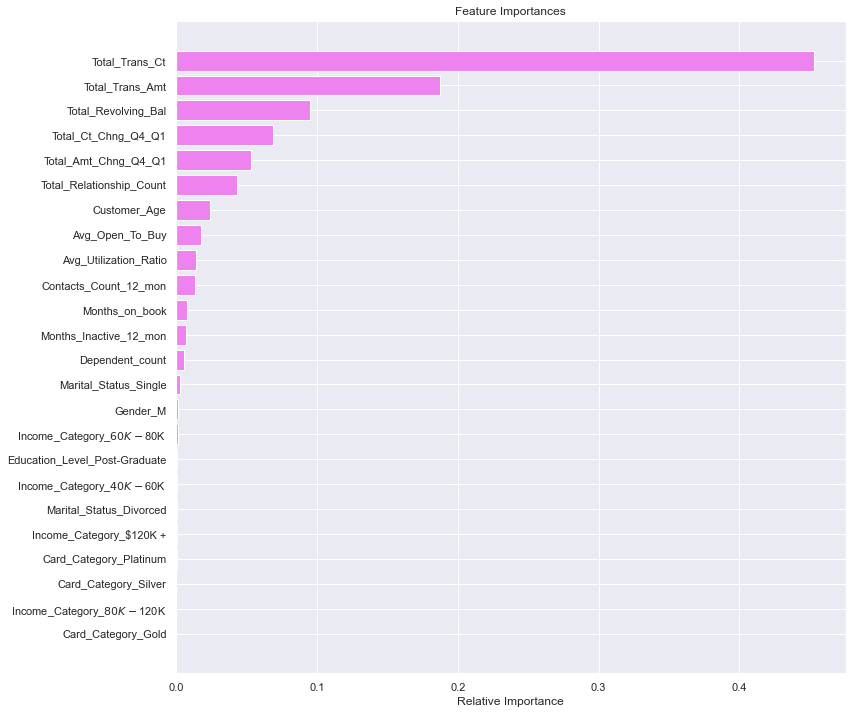

In [145]:
feature_names = X_train.columns
importances = gbm_tuned2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

# Final Recommendation

- The tuned GBM model, trained on the undersampled dataset proved to be the best model to predict customer attrition based upon available data associated with their credit card usage
- Based upon model indication of most influential variables, in combination with univariate and bivariate analyses, we see that total transaction count over the last 12 months, total transaction amount over the last 12 months, total revolving balance, changes in transaction count and transaction amount over the last 12 months are all top indicators of attrition
- In addition, there is signal associate with customer age and number of accounts the customer has with the bank
- Recommended approaches to reducing attrition involve early intervention when there are changes in spending habbits, specifically reduced number of transactions, and an decrease in revolving balance, as these indicate that the customer may be working to pay down the credit balance amount and close the card (attrit)
- The bank should engage credit card holders with other offers such as high interest savings accounts, free checking accounts, low interest car or home loans, and other monetary benefits to opening more accounts or obtaining more services with the bank. In this way, the bank has increased touchpoints, the customer has increased reliance on the services, and it is more of an effort to change or cancel services to move to a new bank.
- Banks can also focus on customers at various ages, specifically younger customers, by offering learning opportuniites such as budgeting classes or new homeowner classes, as increased touchpoints will decrease likelihood of attrition. 

# Pipeline

In [146]:
ccdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   Customer_Age                      10127 non-null  int64   
 1   Gender                            10127 non-null  category
 2   Dependent_count                   10127 non-null  int64   
 3   Education_Level                   8608 non-null   category
 4   Marital_Status                    9378 non-null   category
 5   Income_Category                   9015 non-null   category
 6   Card_Category                     10127 non-null  category
 7   Months_on_book                    10127 non-null  int64   
 8   Total_Relationship_Count          10127 non-null  int64   
 9   Months_Inactive_12_mon            10127 non-null  int64   
 10  Contacts_Count_12_mon             10127 non-null  int64   
 11  Credit_Limit                      10127 non-null  floa

In [147]:
# creating a list of numerical variables
numerical_features = [
    "Customer_Age",
    "Dependent_count",
    "Months_on_book",
     "Total_Relationship_Count",
     "Months_Inactive_12_mon",
     "Contacts_Count_12_mon",
     "Credit_Limit",
     "Total_Revolving_Bal",     
     "Avg_Open_To_Buy",         
     "Total_Amt_Chng_Q4_Q1",    
     "Total_Trans_Amt",         
     "Total_Trans_Ct",          
     "Total_Ct_Chng_Q4_Q1",     
     "Avg_Utilization_Ratio"
    
]

# creating a transformer for numerical variables, which will apply simple imputer on the numerical variables
numeric_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="median"))])


# creating a list of categorical variables
categorical_features = ["Gender","Education_Level","Marital_Status","Income_Category","Card_Category"]

# creating a transformer for categorical variables, which will first apply simple imputer and 
#then do one hot encoding for categorical variables
categorical_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("onehot", OneHotEncoder(handle_unknown="ignore")),
    ]
)
# handle_unknown = "ignore", allows model to handle any unknown category in the test data

# combining categorical transformer and numerical transformer using a column transformer

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numerical_features),
        ("cat", categorical_transformer, categorical_features),
    ],
    remainder="passthrough",
)
# remainder = "passthrough" has been used, it will allow variables that are present in original data 
# but not in "numerical_columns" and "categorical_columns" to pass through the column transformer without any changes


In [148]:
# Separating target variable and other variables
X = ccdata.drop(columns="Attrition_Flag_Attrited Customer")
Y = ccdata["Attrition_Flag_Attrited Customer"]

In [149]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1, stratify=Y
)
print(X_train.shape, X_test.shape)

(7088, 19) (3039, 19)


In [150]:
# Creating new pipeline with best parameters
model = Pipeline(
    steps=[
        ("pre", preprocessor),
        (
            "XGB",
            XGBClassifier(
                random_state=1,
                n_estimators=50,
                scale_pos_weight=10,
                subsample=1,
                learning_rate=0.05,
                gamma=0,
                eval_metric="logloss",
                reg_lambda=10,
                max_depth=1,
            ),
        ),
    ]
)
# Fit the model on training data
model.fit(X_train, y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['Customer_Age',
                                                   'Dependent_count',
                                                   'Months_on_book',
                                                   'Total_Relationship_Count',
                                                   'Months_Inactive_12_mon',
                                                   'Contacts_Count_12_mon',
                                                   'Credit_Limit',
                                                   'Total_Revolving_Bal',
                                                   'Avg_Open_To_Buy',
                            